<a href="https://colab.research.google.com/github/M-GILMENDOZA/AEA1/blob/main/python_track_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Question:**

With this study, we are looking to check how the labour market mismatch (observed through the Beveridge curve) evolved during and after the 2007 crisis for some OECD countries. We want to verify if the labour market's efficiency went back to the observed levels before the crisis. To analyse this, we will include annual data until 2019 (before the Covid-19 effects are observed).

# **Motivation**

The Beveridge curve has been called “the neglected stepsister of macroeconomics” by Federal Reserve Chair Janet Yellen when compared to the Philips curve. The Beveridge curve is used to understand the labour market and its efficiency (in terms of the matching process), so it is crucial to learn which shocks affect it and how.  

The 2007 crisis initiated in the United States and affected economies all over the world. So, it is relevant to verify if this recession affected the efficiency of the labour market (if led to movements of the curve instead of movements in the curve) and if countries recovered after the recession, i.e., if the efficiency levels also got back to its initial levels.

We found some pervious works for the effect of the 2007 crisis on the labour market. However, there is a lack of literature that analysed the Beveridge curve after that shock. Desfeanis and Mastromatteo (2015) argue that there are few econometric estimates of this relationship mainly because of the difficulty in collecting vacancy data. This problem is even more significant in cross-country analyses. Thus, besides doing the graphical verification of the Beveridge curve's existence in a set of countries, we also want to do some econometric analyses to estimate the effect of external factors that may influence forward or backward shifts of the Beveridge curve. 


#  **Variables and Data**

The data used was extracted from the OECD Statistics and the World Bank Group. We gathered information from 1990 until 2019 for OECD countries. Nineteen variables of interest were selected, which can be seen in the following table.

Further transformation needs to be done as the initial data has many missing values (like 0 or blank spaces). We also need to only work with OECD countries who have the most information for other explanatory variables.



**Description of the Variables:** 

| Variable       | Source                         | Description                                                                                      |
|----------------|--------------------------------|--------------------------------------------------------------------------------------------------|
| ALB            | OECD Statistics                | Annual Labour Force                                                                              |
| GDPXPRD        | OECD Statistics                | Total Expenditure of R&D as percentage of GDP                                                    |
| GDP            | OECD Statistics                | In millions, national currency with 2015 base                                                    |
| NETK           |  OECD Statistics               | Net capital stock for business services sector, in millions, national currency with 2015 base|                                                                                                  |
| STR_REG        | OECD Statistics                | Strictness of employment protection - Individual and collective dismissals (regular contracts)   |
| STR_TEMP       | OECD Statistics                | Strictness of employment protection - Temporary Contracts                                        |
| TAXWEDGE       | OECD Statistics                | Total Tax Wedge                                                                                  |
| TUD            | OECD Data Frame                | Trade Union Density                                                                              |
| UNBENEFIT      | OECD Statistcs                 | Proportion of previous in-work household income maintained after 12 months of unemployment       |
| UR             | OECD Statistics                | Unemployment Rate                                                                                |
| URAdvanced     | World Bank-World Development Indicators   | % of Labour force unemployed with Advanced education                                             |
| URBasic        | World Bank-World Development Indicators   | % of Labour force unemployed with Basic education                                                |
| URIntermediate | World Bank-World Development Indicators   | % of Labour force unemployed with Intermediate education                                         |
| Vacancies      | OECD Statistics                | Vacancies notified by firms to employment agencies which remain unfilled at the end of the month |
| VR             | Self-constructed from the data | Vacancy Rate                                                                                     |
| GPDHRWKD     |OECD Statistics                | GDP per hour worked - Total, US dollars, 1990 – 2019 |
| MFP      | OECD Statistics                |Multifactor productivityTotal, Annual growth rate (%), 1990 – 2019 |
| URF | World Bank-World Development Indicators   | Unemployment, female (% of female labor force) (national estimate) |
| URM | World Bank-World Development Indicators   | Unemployment, male (% of male labor force) (national estimate) |
| EDUCEXP | World Bank-World Development Indicators   | Current education expenditure, total (% of total expenditure in public institutions)|
| KFOR | World Bank-World Development Indicators   | Gross fixed capital formation (annual % growth)|
| RRD | World Bank-World Development Indicators   | Researchers in R&D (per million people)|
| RD | World Bank-World Development Indicators   | Research and development expenditure (% of GDP)|
| SC | World Bank-World Development Indicators   | Social contributions (% of revenue) |
| TRADE | World Bank   | Trade as % of GDP (imports+ exports)/GDP |

**Transforming the Data**

In [ ]:
#Import the necessary packages for this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Importing files on google colabs:
from google.colab import files
uploaded = files.upload()

Saving Beveridge-data.xlsx to Beveridge-data.xlsx
Saving WB - GDP growth.xlsx to WB - GDP growth.xlsx


In [ ]:
#Import dataframe --> need to finish declaring what each variable type is
Beveridge= pd.read_excel('Beveridge-data.xlsx', sheet_name="Data-Anually",  header=0, dtype={'Country':str, 'ALB':float,'Year':int,'GDEXPRD':float,'GDP':float})

#Sort by country and then by year
Beveridge.sort_values(['Country', 'Year'], ascending=[True, True], inplace=True)

#Annual Labour force is on thousands, so it is necessary to be convert to units to calculate Vacancies rate
Beveridge['ALB']= Beveridge['ALB']*1000
Beveridge['VR'] = (Beveridge['Vacancies']/Beveridge['ALB'])*100 #creating job vacancies rate variable
Beveridge['VR2']=Beveridge['VR']**2 #for regressions


In [ ]:
#Import gdp dataframe for one graph
GDP_growth= pd.read_excel('WB - GDP growth.xlsx', sheet_name="Data",  header=0)
GDP_growth.replace(',,', np.nan, inplace=True) #the missing values on this dataframe are ',,'
GDP_growth.head()

,Year,Australia,Austria,Czech Republic,Finland,Germany,Hungary,Luxembourg,Norway,Poland,Portugal,Sweden,United States,United Kingdom
0,1989,3.9,3.9,NaN,5.1,3.9,NaN,9.8,1.0,NaN,6.4,2.7,3.7,2.6
1,1990,3.6,4.3,NaN,0.7,5.3,NaN,5.3,1.9,NaN,4.0,0.8,1.9,0.7
2,1991,-0.4,3.4,-11.6,-5.9,5.1,NaN,8.6,3.1,-7.0,4.4,-1.1,-0.1,-1.1
3,1992,0.4,2.1,-0.5,-3.3,1.9,-3.1,1.8,3.6,2.5,1.1,-1.2,3.5,0.4
4,1993,4.0,0.5,0.1,-0.7,-1.0,-0.6,4.2,2.8,3.7,-2.0,-2.1,2.8,2.5


In [ ]:
#Now we see all the countries that appear on the list
#Overview of all the countries in the list
Beveridge.value_counts('Country')

Country
Venezuela                        30
Ecuador                          30
Estonia                          30
Euro area (19 countries)         30
European Union (28 countries)    30
                                 ..
OECD - Total                     30
OECD countries                   30
Panama                           30
Paraguay                         30
Albania                          30
Length: 90, dtype: int64

In [ ]:
#Our dataset has many different ways to express missing values
#So we transformed the 0 and blank entries to NaN
Beveridge.replace(0, np.nan, inplace=True)
Beveridge.replace(np.inf, np.nan, inplace=True) #when we create VR and ALB is missing python fills with "inf" (like dividing by zero), this replace this values to "NaN"
Beveridge.replace(r'^\s*$', np.nan, regex=True)
print("In our raw dataset we have this many missing values:")
Beveridge.isnull().sum().sum()

In our raw dataset we have this many missing values:


57080

The database structure can be seen on the following table. As discovered above, there are many missing values and countries that do not belong to the OECD. 

In [ ]:
Beveridge.head()

,Country,Year,ALB,EDUCEXP,GDEXPRD,GDP,KFOR,NETK,RD,RRD,SC,STR_REG,STR_TEMP,TAXWEDGE,TRADE,TUD,UNBENEFIT,UR,URAdvanced,URBasic,URF,URIntermediate,URM,Vacancies,GPDHRWKD,MFP,VR,VR2
0,Albania,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the next step, we only keep the countries with complete information for Vacancies and Unemployment rate variables. 

In [ ]:
#We only Need OECD countries, so we drop the rest. 
#First we start by dropping the countries that don't have  data in Vacancies and UR, since we need both to form the curve
Beveridge=Beveridge.dropna(subset=['VR', 'UR']) #This allows to drop the lines that have missing values for Vacancies or Unemployment rate
Beveridge.reset_index()

Beveridge.value_counts('Country') #see how many observations there are for each country

Country
Sweden            30
Portugal          30
Norway            30
Finland           30
Germany           29
Australia         28
Czech Republic    27
Austria           27
Hungary           24
Poland            23
United Kingdom    22
Luxembourg        22
United States     19
Spain             15
Belgium           14
Switzerland       10
dtype: int64

After dropping the rows with missing values for either the Vacancies or Unemployment rate variables, we remain with 16 countries. 

We can observe that Sweden, for example, has complete data - as it has all 30 years, while Switzerland is only left with 10 years, meaning that much information is missing.

Since for our analysis, we want to verify too how the Beveridge curve behaved after the crisis for each country, we had to drop more observations:


*   For Belgium and Spain, there is only data until 2003 and 2004, respectively. Thus, it is not possible to plot the Beveridge curve for the 2007 crisis and the period that followed it;
*   For Switzerland, we only have data for the period of 2010-2019, which does not allow us to observe how the Beveridge curve behaved before and during the crisis;
*   Lastly, the United Kingdom has data only until 2011, which is not enough to observe the after crisis trends in the Beveridge curve.

After this, we will remain with 12 countries in our dataframe.

In [ ]:

## We still need to drop Switzerland, Belgium, Spain and UK
Beveridge = Beveridge.loc[~((Beveridge['Country'] == 'Spain') | (Beveridge['Country'] == 'Switzerland') | (Beveridge['Country'] == 'Belgium') | (Beveridge['Country'] == 'United Kingdom')),:]
#on the previous code, the ~ works to do the opposite. So we are saying to keep every row except the ones that column 'country' is esqual to Spain, Switzerlan, Belgium or UK

Beveridge.value_counts('Country') #see how many observations there are for each country

Country
Sweden            30
Portugal          30
Norway            30
Finland           30
Germany           29
Australia         28
Czech Republic    27
Austria           27
Hungary           24
Poland            23
Luxembourg        22
United States     19
dtype: int64

In [ ]:
#Resetting the Index After Dropping Variables
Beveridge.reset_index(drop=True, inplace=True)

#Create dummies --> we create them after cutting other countries, so it is less heavy
country_dummies = pd.get_dummies(Beveridge['Country'])
Beveridge=Beveridge.merge(country_dummies, left_index=True, right_index=True) #because there aren't common columns, we need to use the index
#Beveridge.tail() #helps to check if the merge worked

#to create year dummy, we can first transform it into a string
Beveridge['Year'] = Beveridge['Year'].astype(str)

#print(Beveridge.dtypes) 

#Now we can create yearly dummies using pd.get_dummies
year_dummies = pd.get_dummies(Beveridge['Year'])
Beveridge=Beveridge.merge(year_dummies, left_index=True, right_index=True) #because there aren't common columns, we need to use the index

#convert back year to interger:
Beveridge['Year'] = Beveridge['Year'].astype(int)
print(Beveridge.dtypes) #this shows the type of data for each variable

#Create the dummy for crisis
Beveridge['CRISIS'] = Beveridge['2008'] + Beveridge['2009'] + Beveridge['2010']

#dummy for after crisis
Beveridge['POST_CRISIS']= Beveridge['2011'] + Beveridge['2012'] + Beveridge['2013'] + Beveridge['2014'] + Beveridge['2015'] + Beveridge['2016'] + Beveridge['2017'] + Beveridge['2018'] + Beveridge['2019']

#dummy exp to try do graph with 3 colours depending on the period
Beveridge['Period']=1+Beveridge['CRISIS']+(Beveridge['POST_CRISIS']*2)

#Making dictionary
#Beveridge = pd.DataFrame(dict(Country=Country,	Year=Year,	ALB=ALB,	EDUCEXP=EDUCEXP,	GDEXPRD=GDEXPRD,	GDP=GDP,	KFOR=KFOR,	NETK=NETK,	RD=RD,	RRD=RRD,	SC=SC,	STR_REG=STR_REG,	STR_TEMP=STR_TEMP,	TAXWEDGE=TAXWEDGE,	TRADE=TRADE,	TUD=TUD,	UNBENEFIT=UNBENEFIT,	UR=UR,	URAdvanced=URAdvanced,	URBasic=URBasic,	URF=URF,	URIntermediate=URIntermediate,	URM=URM,	Vacancies=Vacancies,	GPDHRWKD=GPDHRWKD,	MFP=MFP, VR=VR,	VR2=VR2,	CRISIS=CRISIS,	POST_CRISIS=POST_CRISIS,	Period=Period))

Beveridge.tail() #helps to check if the merge worked


Country     object
Year         int64
ALB        float64
EDUCEXP    float64
GDEXPRD    float64
            ...   
2015         uint8
2016         uint8
2017         uint8
2018         uint8
2019         uint8
Length: 71, dtype: object


,Country,Year,ALB,EDUCEXP,GDEXPRD,GDP,KFOR,NETK,RD,RRD,SC,STR_REG,STR_TEMP,TAXWEDGE,TRADE,TUD,UNBENEFIT,UR,URAdvanced,URBasic,URF,URIntermediate,URM,Vacancies,GPDHRWKD,MFP,Unnamed: 26,VR,VR2,Australia,Austria,Czech Republic,Finland,Germany,Hungary,Luxembourg,Norway,Poland,Portugal,Sweden,United States,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,CRISIS,POST_CRISIS,Period
314,United States,2015,157129900.0,NaN,2.716598,18224704.4,3.651450,NaN,2.71742,4267.839,NaN,0.09,0.25,31.437078,27.8,NaN,NaN,5.292,3.0323,7.7599,5.1785,7.0868,5.3692,5566667.0,69.155200,0.832527,NaN,3.542717,12.550841,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3
315,United States,2016,159187200.0,NaN,2.760293,18523195.7,1.838682,NaN,2.76145,4247.748,NaN,0.09,0.25,31.580608,26.5,NaN,NaN,4.867,2.9076,7.4917,4.7888,6.4713,4.9397,5856834.0,69.381403,0.055938,NaN,3.679212,13.536598,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3
316,United States,2017,160319800.0,NaN,2.812501,18962158.5,3.538410,NaN,2.81741,4412.435,NaN,0.09,0.25,31.775433,27.2,NaN,NaN,4.350,2.6857,6.5506,4.3086,5.7655,4.3964,6115750.0,70.092267,0.690335,NaN,3.814719,14.552082,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3
317,United States,2018,162075000.0,NaN,2.825786,19517242.6,4.798152,NaN,2.83766,NaN,NaN,0.09,0.25,29.598968,27.5,NaN,NaN,3.900,2.4500,5.8722,3.8377,5.1715,3.9468,7102750.0,70.906795,0.865145,NaN,4.382385,19.205296,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
318,United States,2019,163538700.0,NaN,NaN,NaN,2.266114,NaN,NaN,NaN,NaN,0.09,0.25,29.756748,26.3,NaN,NaN,3.667,2.3804,5.3963,3.6095,4.8396,3.7221,7151334.0,71.783108,0.701556,NaN,4.372870,19.121988,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3


In [ ]:
#Now we separate each country in exclusive dataframes, which makes it easier for the graphs coding
Beveridge_Sweden=Beveridge.loc[Beveridge["Country"]=="Sweden"]
Beveridge_Norway=Beveridge.loc[Beveridge["Country"]=="Norway"]
Beveridge_Portugal=Beveridge.loc[Beveridge["Country"]=="Portugal"]
Beveridge_Luxembourg=Beveridge.loc[Beveridge["Country"]=="Luxembourg"]
Beveridge_Finland=Beveridge.loc[Beveridge["Country"]=="Finland"]
Beveridge_Germany=Beveridge.loc[Beveridge["Country"]=="Germany"]
Beveridge_Australia=Beveridge.loc[Beveridge["Country"]=="Australia"]
Beveridge_Czech=Beveridge.loc[Beveridge["Country"]=="Czech Republic"]
Beveridge_Austria=Beveridge.loc[Beveridge["Country"]=="Austria"]
Beveridge_Hungary=Beveridge.loc[Beveridge["Country"]=="Hungary"]
Beveridge_Poland=Beveridge.loc[Beveridge["Country"]=="Poland"]
Beveridge_USA=Beveridge.loc[Beveridge["Country"]=="United States"]

In [ ]:
#This helps checking if the dummies are correct
Beveridge_USA.loc[:, ['Country', 'Australia', 'Austria', 'Czech Republic', 'Finland', 'Germany', 'Hungary', 'Luxembourg', 'Norway', 'Poland', 'Portugal', 'Sweden', 'United States']]
#Since all observations from the USA are 1 for the United States' dummy and zero for the others, the previous must also be correct (since they are ordered alphabetically)

,Country,Australia,Austria,Czech Republic,Finland,Germany,Hungary,Luxembourg,Norway,Poland,Portugal,Sweden,United States
300,United States,0,0,0,0,0,0,0,0,0,0,0,1
301,United States,0,0,0,0,0,0,0,0,0,0,0,1
302,United States,0,0,0,0,0,0,0,0,0,0,0,1
303,United States,0,0,0,0,0,0,0,0,0,0,0,1
304,United States,0,0,0,0,0,0,0,0,0,0,0,1
305,United States,0,0,0,0,0,0,0,0,0,0,0,1
306,United States,0,0,0,0,0,0,0,0,0,0,0,1
307,United States,0,0,0,0,0,0,0,0,0,0,0,1
308,United States,0,0,0,0,0,0,0,0,0,0,0,1
309,United States,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Now we need to see which countries have missing values.
Beveridge_Sweden.isnull().sum()
Beveridge_Norway.isnull().sum()
Beveridge_Portugal.isnull().sum()
Beveridge_Luxembourg.isnull().sum()
Beveridge_Finland.isnull().sum()
Beveridge_Germany.isnull().sum()
Beveridge_Australia.isnull().sum()
Beveridge_Czech.isnull().sum()
Beveridge_Austria.isnull().sum()
Beveridge_Hungary.isnull().sum()
Beveridge_Poland.isnull().sum()
Beveridge_USA.isnull().sum()

Country         0
Year            0
ALB             0
EDUCEXP        17
GDEXPRD         1
               ..
2018            0
2019            0
CRISIS          0
POST_CRISIS     0
Period          0
Length: 73, dtype: int64

| Variable       | Sweden | Norway | Portugal | Luxembourg | Finland | Germany | Australia | Czech Republic | Austria | Hungary | Poland | United States |
|----------------|--------|--------|----------|------------|---------|---------|-----------|----------------|---------|---------|--------|---------------|
| Year           | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| ALB            | 0      | 0      | 0        | 8          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| EDUCEXP        | 11     | 10     | 11       | 24         | 11      | 16      | 24        | 7              | 7       | 4       | 4      | 17            |
| GDPXPRD        | 8      | 7      | 1        | 13         | 1       | 1       | 14        | 3              | 0       | 1       | 1      | 1             |
| GDP            | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 1             |
| KFOR           | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| NETK           | 30     | 1      | 12       | 6          | 1       | 1       | 1         | 1              | 1       | 2       | 5      | 19            |
| RD             | 11     | 10     | 7        | 13         | 7       | 6       | 17        | 4              | 4       | 1       | 1      | 1             |
| RRD            | 11     | 11     | 7        | 13         | 15      | 6       | 21        | 4              | 10      | 1       | 1      | 2             |
| SC             | 2      | 6      | 6        | 6          | 27      | 1       | 23        | 3              | 3       | 1       | 1      | 19            |
| STR_REG        | 0      | 0      | 0        | 18         | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| STR_TEMP       | 0      | 0      | 0        | 18         | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| TAXWEDGE       | 10     | 10     | 10       | 10         | 10      | 9       | 10        | 7              | 7       | 4       | 3      | 0             |
| TRADE          | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| TUD            | 2      | 1      | 18       | 10         | 1       | 1       | 14        | 1              | 1       | 10      | 7      | 19            |
| UNBENEFIT      | 11     | 11     | 11       | 11         | 11      | 12      | 11        | 8              | 8       | 5       | 4      | 13            |
| UR             | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| URAdvanced     | 8      | 8      | 8        | 9          | 8       | 7       | 13        | 3              | 4       | 2       | 1      | 0             |
| URBasic        | 8      | 8      | 8        | 9          | 8       | 7       | 13        | 3              | 4       | 2       | 1      | 0             |
| URF            | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| URIntermediate | 8      | 8      | 8        | 9          | 8       | 7       | 13        | 3              | 4       | 2       | 1      | 0             |
| URM            | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| Vacancies      | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |
| GPDHRWKD       | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 2       | 0       | 0      | 0             |
| MFP            | 1      | 2      | 2        | 7          | 0       | 1       | 1         | 27             | 1       | 24      | 23     | 0             |
| VR             | 0      | 0      | 0        | 0          | 0       | 0       | 0         | 0              | 0       | 0       | 0      | 0             |

Clearly, we have a problem concerning missing values. A possible solution could be to interpolate the values if there is data before and after. Meaning that we will not fill data if the first 10 years are missing because it would return the same value for each year. For example, in Australia's case, the values for the variable GDEXPRD are biannual. We interpolate it to have data with annual information. 

In [ ]:
Beveridge_Sweden1=Beveridge_Sweden.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Portuga1=Beveridge_Portugal.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Norway1=Beveridge_Norway.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Luxembourg1=Beveridge_Luxembourg.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Finland1=Beveridge_Finland.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Germany1=Beveridge_Germany.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Australia1=Beveridge_Australia.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Czech1=Beveridge_Czech.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Austria1=Beveridge_Austria.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Hungary1=Beveridge_Hungary.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_Poland1=Beveridge_Poland.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)
Beveridge_USA1=Beveridge_USA.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)


In [ ]:
Beveridge1=Beveridge.interpolate(method='linear',limit_direction='forward',axis=0,limit=1)

# **Theory of Beveridge Curve**

The Beveridge curve was first plotted by Dow and Dicks-Mireaux (1958) and showed the negative correlation between unemployment and unfilled job vacancies. Dow and Dicks-Mireaux (1958) studied the reliability of unemployment and unfilled vacancies statistics for Great Britain from 1946 until 1956. In the 1980s, researchers started calling that graphical relationship "Beveridge curve" in honour of William Henry Beveridge, who studied the difficulties of matching workers to jobs in the 1930s and 1940s.

In this sense, the Beveridge curve can illustrate trends in labour demand. The fact that there might be a high number of unfilled job vacancies and high unemployment might indicate a mismatch between the labour demanded, and the labour supplied. Thus, some unemployment is due to maladjustment. This mismatch can be due to technological progress or difference between skills demanded by firms and the skills offered by the labour force.

The pressure of labour demand would lead to movements along the curve by (i) increasing the number of unfilled vacancies and (ii) reducing unemployment. However, it will not reach zero unemployment rate due to the maladjustment mentioned before. This means that unemployment is decreasingly sensitive to demand above a certain point. This is also observed for unfilled vacancies.

In Dow and Dicks-Mireaux (1958) paper, we can find a graph that shows the negative relationship between unemployment and vacancies. Initially, this curve plots unemployment (as unemployed as a percentage of employees) and vacancies (as the ratio of vacancies to total employment).

The 45-degree line defines the zero net excess demand (points where unemployment equals true vacancies). The successive points on this line represent the different degrees of maladjustment.

For all degrees of maladjustment, there will be a series of points of different demand levels that lay on the convex series towards the origin curve (the many possible Beveridge curves).

For more current papers, the Beveridge curve is drawn with job vacancy rate on the y-axis and unemployment on the x-axis (opposite of the observed-on Dow and Dicks-Mireaux (1958) paper).

The search-and-matching of the labour market can explain the movements along the curve: at the peak of a business cycle, the unemployment rate is low and the job vacancy rate is high (top left side of the graph). As the economy slows down, firms are less likely to open new vacancies and may not renew some workers contracts, so job vacancy rate goes down and unemployment starts to rise. On recessions, unemployment is high, and job vacancies are low (bottom right side of the graph). This can show the negative correlation observed on the Beveridge curve.

The closest the Beveridge curve is to the origin, the more efficient the labour market is (lower mismatch problems).

The mismatch is still referred to as one of the main influences behind the Beveridge Curve's shifts. Many possible factors lead to market inefficiencies (mismatch). Some institutions may affect the Beveridge curve by influencing the long-run unemployment equilibrium:

*   High Union density is expected to give workers power in setting wages, which may impact labour demand. So, trade union density may have a significant positive impact on unemployment.
*   Employment protection legislation may make employers more prudent to open new vacancies and hire new people. Thus, unemployment decreases more slowly than if there were no protection. On the other hand, firms cannot fire employers as quickly. Consequently, unemployment does not increase as fast. Therefore, in the end, these opposite effects might offset each other, and there may be no observed effects on the curve, or one of the effects is higher than the other. Subsequently, a negative, positive or null impact can be expected on the curve from employment protection legislation. 
*   If unemployment benefits are too high, it may decrease the will of unemployed individuals to go back to work (so may have a positive impact on unemployment, leading to an outward shift of the curve).
*   Tax wedge is defined as the ratio between the amount of taxes paid by an average single worker (a single person at 100% of average earnings) without children and the employer's corresponding total labour cost. The average tax wedge measures the extent to which tax on labour income discourages employment. If high, this indicator has a negative impact on labour demand, thus a positive effect on unemployment (expected to provoke an outward shift of the curve).

Other factors that may lead to shifts in the Beveridge curve:
*   Technological progress may have either a positive or a negative impact on unemployment. On the one hand, technological change can be accompanied by faster obsolescence of workers' skills, increasing the mismatch (outward shift). On the other hand, technological progress leads to economic growth, which may increase new job vacancies, which means a higher job-finding rate of unemployed workers. This last effect is called "capitalisation effect" and is expected to shift the Beveridge curve inwards. So, the effect of technological progress must depend on which effect is larger: job destruction or job creation. If job destruction is faster than job creation, the impact of productivity growth on unemployment should be positive in the short run but will turn negative in the medium/long run.
*   Globalisation allows for job exportation to low-wage countries, which may provoke an outward shift of the Beveridge curve.


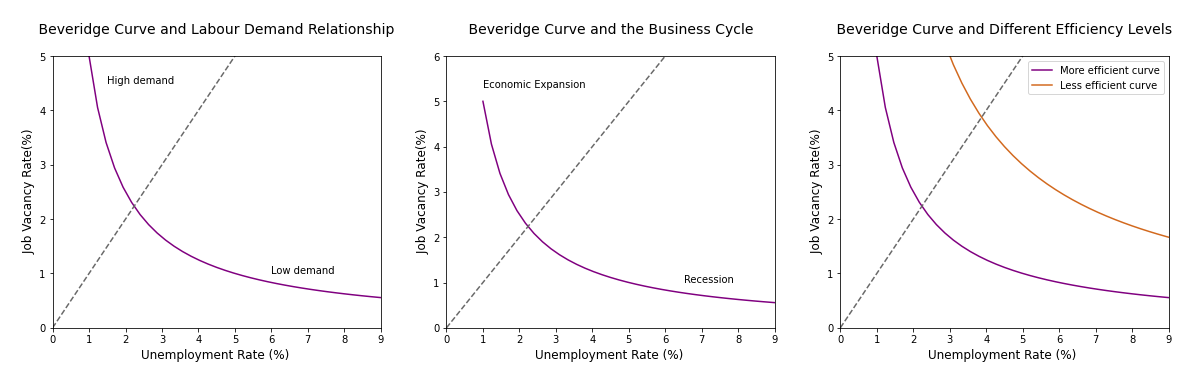

In [ ]:
#simulation of what the beveridge curve should look like
un = np.linspace(1, 15, num=61, endpoint=True, retstep=False, dtype=None, axis=0) #creates a vector with 50 valued from 1 to 15, all with the same interval
vacancy=-np.sort(-(5/un)) # creates variable vacancy that is convex and sorts in descending order
line4=np.linspace(0,10, num=11,endpoint=True, retstep=False, dtype=None, axis=0)
vacancy2=-np.sort(-(15/un)) #create a vacancy values that will generate a curve that is further away from the origin

#do the graphs
fig, Bev_sim = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=False)

Bev_sim[0].plot(un, vacancy, color='purple')
Bev_sim[0].plot(line4, line4, '--', color = 'dimgray')
Bev_sim[0].set_xlabel('Unemployment Rate (%) \n ', fontsize=12)
Bev_sim[0].set_ylabel('\n Job Vacancy Rate (%)', fontsize=12)
Bev_sim[0].set_xlim(0, 8)
Bev_sim[0].set_ylim(0, 5)
Bev_sim[0].text(6,1, 'Low demand')
Bev_sim[0].text(1.5,4.5, 'High demand')
Bev_sim[0].set_title('\n Beveridge Curve and Labour Demand Relationship \n ', fontsize=14)


Bev_sim[1].plot(un, vacancy, color='purple')
Bev_sim[1].plot(line4, line4, '--', color = 'dimgray')
Bev_sim[1].set_xlabel('Unemployment Rate (%) \n ', fontsize=12)
Bev_sim[1].set_ylabel('\n Job Vacancy Rate (%)', fontsize=12)
Bev_sim[1].set_xlim(0, 9)
Bev_sim[1].set_ylim(0, 6)
Bev_sim[1].text(6.5,1, 'Recession')
Bev_sim[1].text(1,5.3, 'Economic Expansion')
Bev_sim[1].set_title('\n Beveridge Curve and the Business Cycle \n ', fontsize=14)


Bev_sim[2].plot(un, vacancy, color='purple', label='More efficient curve')
Bev_sim[2].plot(un, vacancy2, color='chocolate', label='Less efficient curve')
Bev_sim[2].plot(line4, line4, '--', color = 'dimgray')
Bev_sim[2].set_xlabel('Unemployment Rate (%) \n ', fontsize=12)
Bev_sim[2].set_ylabel('\n Job Vacancy Rate (%)', fontsize=12)
Bev_sim[2].set_xlim(0, 9)
Bev_sim[2].set_ylim(0, 5)
Bev_sim[2].legend()
Bev_sim[2].set_title('\n Beveridge Curve and Different Efficiency Levels \n ', fontsize=14)
plt.show()


# **Empirical evidence of the Beveridge curve**

Previous studies have used the Beveridge curve to describe the labour market. Shifts in the curve are relevant in times of crisis in that they describe the changing relationship between vacancies and unemployment. Ergen, van Loon and Verbeek (2014) used the Beveridge curve to assess if labour mismatch had increased during the Great Recession in the labour market of the Netherlands. The results showed that the Netherlands currently does not appear to have a mismatch problem.

Additionally to the graphical results explained in the theoretical framework, an econometric analysis can be derived from the curve. This is done by running regressions and assessing which variables shift the curve inwards or outwards by verifying the coefficients and statistical significance. Different econometric approaches can be used. In Bontuis et al. (2013), the authors found that the Great Recession caused an outward shift of the Beveridge Curve in Spain and France, while the shift was inwards for Germany. 

Lubik and Rhodes (2014) analysed the Beveridge curve in the US after the recession of 2007-2009 and concluded that the expansionary monetary policy had done little to reduce the unemployment rate.


# **Variables choice**

We tried to measure technological progress with the available data by R&D intensity and labour productivity (measured in GDP per hour worked). We found an indicator of net capital stock (in volumes of the local currency with 2015 as the base year). The data was obtained to follow the approach done by Destefanis and Mastromatteo (2015). In their paper, they used capital per worker (ratio of the capital stock of the business sector to total employment) as one of the proxies for technological progress. 

The idea behind the R&D intensity and labour productivity indicators was the following: (i) there may be a higher probability of technological progress if the expense in R&D is higher (following the Aghion & Howitt model, 1992); and (ii) labour productivity should be higher if there are better technologies being used, so a change in labour productivity may indicate technological progress.

We alternatively could also try to use the number of researchers per million habitants to check the research intensity. The idea behind it is if there are more labour employed on the research sector, the higher it is the production of new ideas/knowledge that generate technological progress (like it is modelled on, for example, the Product-variety model of Romer, 1990).

Capital formation growth could also indicate investments in production machines, indicating that there may be improvements to old technologies.

Unfortunately, we had to find alternatives for some of these variables due to missing values. For this reason, we suggest the use of labour productivity (GDP per hour worked) and capital formation annual growth to control for technological progress.

 We will need to verify if the correlation between capital formation growth and labour productivity is not too high. Otherwise, these may lead to multicollinearity problems in our regressions.

To measure globalisation, we propose the use of the Trade variable, which measures the weight of international trade on countries GDP ($\frac{\text{Imports + Exports}}{\text{GDP}}$).

To measure the employment protection legislation, we use two indexes created by OECD: 
 
*   Evaluates the regulations on the dismissal (both for individual or collective) of workers;
*   And the second evaluates the employment protection when it comes to hiring workers with temporary contracts. 

These indicators are relative to regulation in force on the 1st of January for each year. These two indexes go from 0 to 6, with higher scores representing stricter regulation.

Lastly, we created two dummies to control for the periods we are interested in:

1.   For the crisis, "CRISIS" dummy goes from 2008 until 2010, since from the graphs, it appears to be some delay between the labour market and the business cycle movements (probably due to employment regulation and measures taken by governments). We assume the same period for all countries for simplicity reasons;
2.   For the after the crisis to measure possible shifts of the curve, the dummy "POST_CRISIS" is equal to 1 from 2011 until 2019.


## **Descriptive Statistics and Graphs**

In [ ]:
#Summary of all indicators
#print(Beveridge.describe()) .-> this are usefull, but show aggregate information for all variables

#print(Beveridge.groupby('Country').describe())  #this shows general statistic for all variables by country

#descriptive statistics for unemployment and job vacancies

desc_stat_UR = Beveridge.groupby('Country').agg({'UR': ['mean', 'median', 'min', 'max']}) 
  
print("Mean, median, min, and max values of unemployment rate by Country") 
print(desc_stat_UR)

desc_stat_VR = Beveridge.groupby('Country').agg({'VR': ['mean', 'median', 'min', 'max']}) 
  
print(" \n Mean, median, min, and max values of job vacancy rate by Country") 
print(desc_stat_VR)

Mean, median, min, and max values of unemployment rate by Country
                       UR                        
                     mean   median    min     max
Country                                          
Australia        6.704000   6.0665  4.379  10.875
Austria          4.833852   4.7580  3.933   6.033
Czech Republic   5.869519   6.4670  2.017   8.775
Finland          9.451400   8.7250  3.167  16.583
Germany          7.268655   7.7920  3.150  11.283
Hungary          7.416708   7.2835  3.450  11.167
Luxembourg       4.540136   4.8750  1.900   6.458
Norway           4.061867   3.8165  2.558   5.950
Poland          11.257652  10.1080  3.283  20.033
Portugal         8.455500   7.3210  4.125  16.458
Sweden           7.097267   7.2085  1.717   9.892
United States    5.980421   5.5330  3.667   9.617
 
 Mean, median, min, and max values of job vacancy rate by Country
                      VR                              
                    mean    median       min       max
Countr

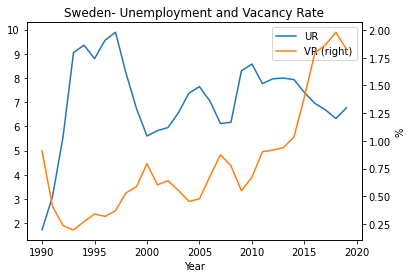

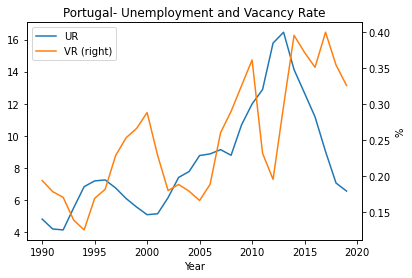

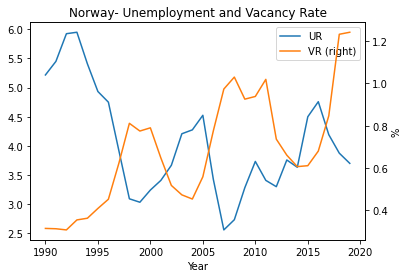

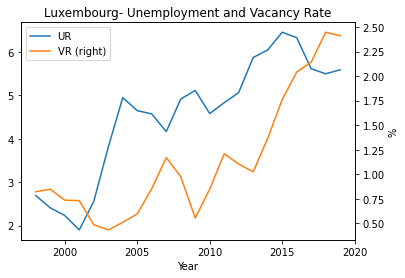

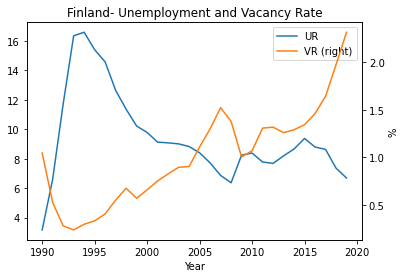

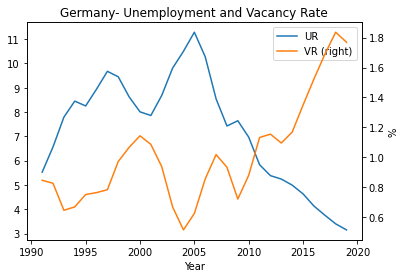

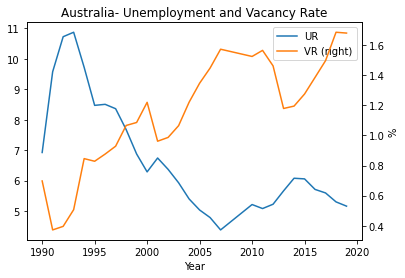

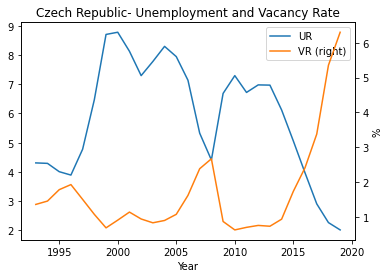

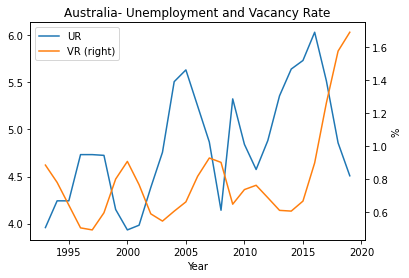

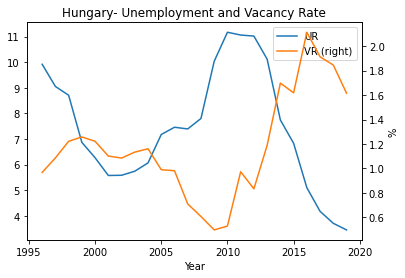

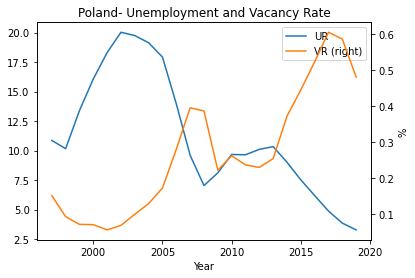

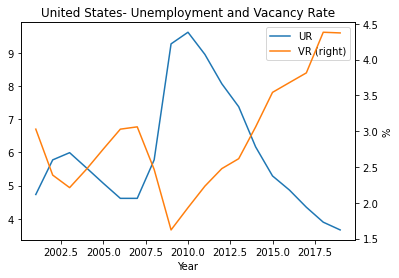

In [ ]:
#Graphs to see the behavior of the Unemployment and Vacancy Rate over the years

fig, ax = plt.subplots()
Beveridge_Sweden.plot(x='Year',y='UR',ax=ax)
Beveridge_Sweden.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Sweden- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Portugal.plot(x='Year',y='UR',ax=ax)
Beveridge_Portugal.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Portugal- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Norway.plot(x='Year',y='UR',ax=ax)
Beveridge_Norway.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Norway- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Luxembourg.plot(x='Year',y='UR',ax=ax)
Beveridge_Luxembourg.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Luxembourg- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Finland.plot(x='Year',y='UR',ax=ax)
Beveridge_Finland.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Finland- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Germany.plot(x='Year',y='UR',ax=ax)
Beveridge_Germany.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Germany- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Australia.plot(x='Year',y='UR',ax=ax)
Beveridge_Australia.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Australia- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Czech.plot(x='Year',y='UR',ax=ax)
Beveridge_Czech.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Czech Republic- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Austria.plot(x='Year',y='UR',ax=ax)
Beveridge_Austria.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Australia- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Hungary.plot(x='Year',y='UR',ax=ax)
Beveridge_Hungary.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Hungary- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_Poland.plot(x='Year',y='UR',ax=ax)
Beveridge_Poland.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Poland- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

fig, ax = plt.subplots()
Beveridge_USA.plot(x='Year',y='UR',ax=ax)
Beveridge_USA.plot(x='Year',y='VR',ax=ax,secondary_y=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('United States- Unemployment and Vacancy Rate')
plt.legend('',frameon=False)

plt.show()

A general conclusion from the graphs is the clear inverse relationship between the Vacancy  Rate (VR) and Unemployment Rate (UR), which is the basis of the Beveridge Curve. 
More specifically, we can see how the Unemployment Rate went up drastically in the United States, and the Vacancy Rate heavily declines. As the years went by and the country recovered, the variables' tendencies inverted. We see unemployment decrease to levels before 2000, and the Vacancies increase.

The crisis had effects on the OECD countries. Norway's UR increased due to the crisis, and after 2010 it began to fall.  The opposite happened with its VR. Portugal's UR also increased considerably and took the country more years to recover. Overall, we can see a noticeable effect of the crisis on the labour market. Also, the recovery process that the countries went through after the crisis. In the next section, we will graph the Beveridge curves for each country and see whether the curves have shifted after the crisis.

## **Beveridge Curve Graphs**

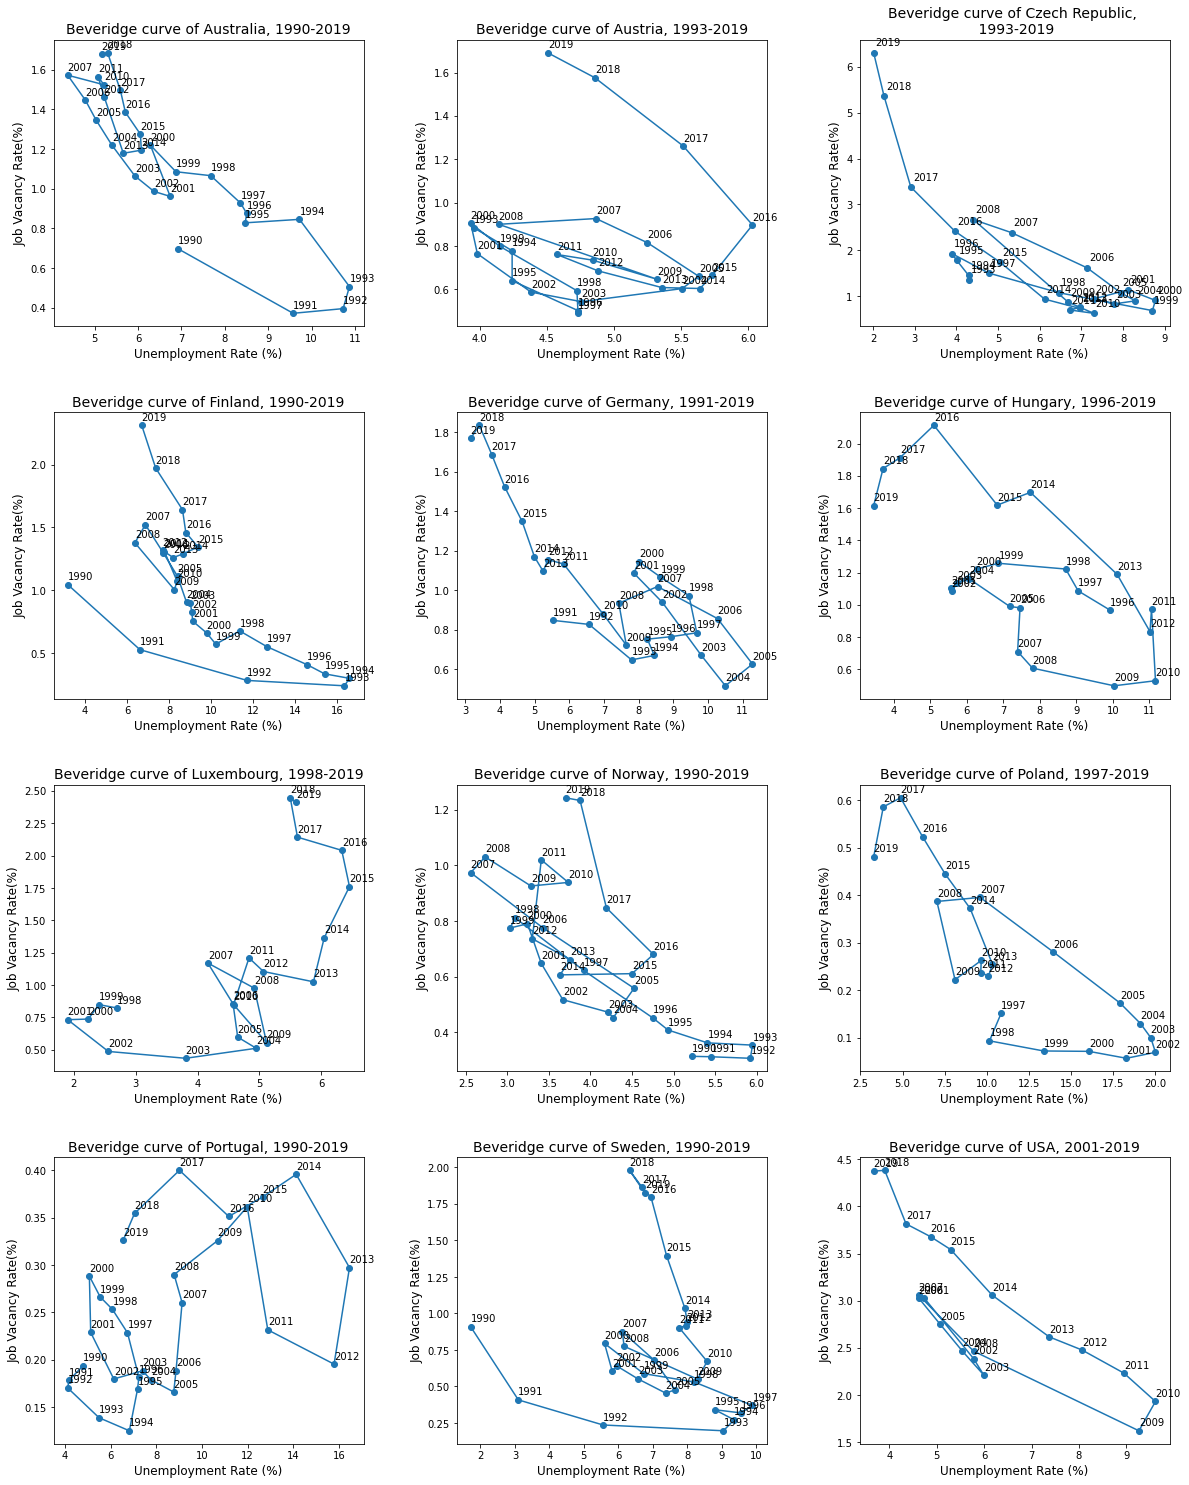

In [ ]:
#Graph with years as point labels
#it is easier to set xy first
Ausx = Beveridge_Austria['UR'].values
Ausy = Beveridge_Austria['VR'].values
Czx = Beveridge_Czech['UR'].values
Czy = Beveridge_Czech['VR'].values
Gerx = Beveridge_Germany['UR'].values
Gery = Beveridge_Germany['VR'].values
Australiax = Beveridge_Australia['UR'].values
Australiay = Beveridge_Australia['VR'].values
Finx = Beveridge_Finland['UR'].values
Finy = Beveridge_Finland['VR'].values
Luxx = Beveridge_Luxembourg['UR'].values
Luxy = Beveridge_Luxembourg['VR'].values
Norx = Beveridge_Norway['UR'].values
Nory = Beveridge_Norway['VR'].values
Prtx = Beveridge_Portugal['UR'].values
Prty = Beveridge_Portugal['VR'].values
Swdx = Beveridge_Sweden['UR'].values
Swdy = Beveridge_Sweden['VR'].values
Polx = Beveridge_Poland['UR'].values
Poly = Beveridge_Poland['VR'].values
Hunx = Beveridge_Hungary['UR'].values
Huny = Beveridge_Hungary['VR'].values
Usax= Beveridge_USA['UR'].values
Usay = Beveridge_USA['VR'].values


#start creating the graphs
fig, graphs = plt.subplots(4, 3, figsize=(20,20), sharex=False, sharey=False)

#adjustments so plots x-labels and titles don't overlap
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.1, wspace=0.3, hspace=0.3)


#set graphs data
graphs[0,0].plot(Australiax, Australiay, marker='o')
graphs[0,1].plot(Ausx, Ausy, marker='o')
graphs[0,2].plot(Czx, Czy, marker='o')
graphs[1,0].plot(Finx, Finy, marker='o')
graphs[1,1].plot(Gerx, Gery, marker='o')
graphs[1,2].plot(Hunx, Huny, marker='o')
graphs[2,0].plot(Luxx, Luxy, marker='o')
graphs[2,1].plot(Norx, Nory, marker='o')
graphs[2,2].plot(Polx, Poly, marker='o')
graphs[3,0].plot(Prtx, Prty, marker='o')
graphs[3,1].plot(Swdx, Swdy, marker='o')
graphs[3,2].plot(Usax, Usay, marker='o')

#set labels
graphs[0,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[0,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[0,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[0,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[0,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[0,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[1,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[1,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[1,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[1,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[1,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[1,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[2,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[2,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[2,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[2,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[2,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[2,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[3,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[3,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[3,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[3,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
graphs[3,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
graphs[3,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)


#set graphs titles
graphs[0,1].set_title('Beveridge curve of Austria, 1993-2019', fontsize=14)
graphs[0,0].set_title('Beveridge curve of Australia, 1990-2019', fontsize=14)
graphs[0,2].set_title('Beveridge curve of Czech Republic, \n 1993-2019', fontsize=14)
graphs[1,0].set_title('Beveridge curve of Finland, 1990-2019', fontsize=14)
graphs[1,1].set_title('Beveridge curve of Germany, 1991-2019', fontsize=14)
graphs[1,2].set_title('Beveridge curve of Hungary, 1996-2019', fontsize=14) #missing data mostly for UR
graphs[2,0].set_title('Beveridge curve of Luxembourg, 1998-2019', fontsize=14) #there is data for vacancies since 1990, but not for the annual labour force
graphs[2,1].set_title('Beveridge curve of Norway, 1990-2019', fontsize=14)
graphs[2,2].set_title('Beveridge curve of Poland, 1997-2019', fontsize=14)
graphs[3,0].set_title('Beveridge curve of Portugal, 1990-2019', fontsize=14)
graphs[3,1].set_title('Beveridge curve of Sweden, 1990-2019', fontsize=14)
graphs[3,2].set_title('Beveridge curve of USA, 2001-2019', fontsize=14)

#Add year labels to data points (need to be done for each country, even with the same dates range, since if done in group it doesn't show all labels)
for i, txt in enumerate(Beveridge_Austria['Year']):
    graphs[0,1].annotate(txt, (Ausx[i], Ausy[i]), xytext=(0,5), textcoords='offset points')

for n, txt2 in enumerate(Beveridge_Czech['Year']):    
    graphs[0,2].annotate(txt2, (Czx[n], Czy[n]), xytext=(2,7), textcoords='offset points')
   
for k, tx in enumerate(Beveridge_Germany['Year']):
    graphs[1,1].annotate(tx, (Gerx[k], Gery[k]), xytext=(0,5), textcoords='offset points')

for l, tt in enumerate(Beveridge_Hungary['Year']):
    graphs[1,2].annotate(tt, (Hunx[l], Huny[l]), xytext=(0,5), textcoords='offset points')

for o, tt in enumerate(Beveridge_Poland['Year']):
    graphs[2,2].annotate(tt, (Polx[o], Poly[o]), xytext=(0,5), textcoords='offset points')

for m, xxx in enumerate(Beveridge_USA['Year']):
  graphs[3,2].annotate(xxx, (Usax[m], Usay[m]), xytext=(0,5), textcoords='offset points')

for j, text in enumerate(Beveridge_Australia['Year']):
    graphs[0,0].annotate(text, (Australiax[j], Australiay[j]), xytext=(0,5), textcoords='offset points')

for p, text2 in enumerate(Beveridge_Finland['Year']):    
    graphs[1,0].annotate(text2, (Finx[p], Finy[p]), xytext=(0,5), textcoords='offset points')

for q, text3 in enumerate(Beveridge_Luxembourg['Year']):    
    graphs[2,0].annotate(text3, (Luxx[q], Luxy[q]), xytext=(0,5), textcoords='offset points')

for r, text4 in enumerate(Beveridge_Norway['Year']):    
    graphs[2,1].annotate(text4, (Norx[r], Nory[r]), xytext=(0,5), textcoords='offset points')

for s, text5 in enumerate(Beveridge_Portugal['Year']):    
    graphs[3,0].annotate(text5, (Prtx[s], Prty[s]), xytext=(0,5), textcoords='offset points')

for t, text6 in enumerate(Beveridge_Sweden['Year']):    
    graphs[3,1].annotate(text6, (Swdx[t], Swdy[t]), xytext=(0,5), textcoords='offset points')

From the previous figure, we can observe that the analysed countries have many different Beveridge curves in terms of form, but especially in terms of behaviour and distance from the origin. Luxembourg and Portugal appear to have quite erratic Beveridge curves, where a convex relationship between the variables is not explicit.

The Czech Republic does not seem to have suffered a shift of the curve from 1993 until 2019.

From the twelve countries, four seemed to have an outward shift during the crisis (assumed the general period of 2008-2010 for the crisis effect): Australia, Norway, Portugal and the USA. Hungary also appears to have an outward shift, mostly from 2008 to 2009. Germany, Austria and Poland appeared to have inward shifts during the financial crisis. Finally, Luxembourg, Finland and Sweden appear to have movements only along the curves (observations close to the graph's bottom right side).

After the crisis, Portugal, Poland, Hungary, and Germany mismatch levels seem to have gotten back to the observed before the crisis. Sweden, Norway, Luxembourg, Finland, Australia and Austria market inefficiencies seem to have gotten worse than the observed levels during the crisis. For the USA the curve seems not to have shifted after the crisis. 

On recent years, in all 12 analysed countries, there is low unemployment rates and high job vacancy rates. This can be observed in recent years' observations on the graph's top-left side, indicating that these countries are either on the peak of their business cycles or starting to “cool down” from one. We can confirm it by analysing the next graph, which shows the twelve countries annual GDP growth (all above 0%).

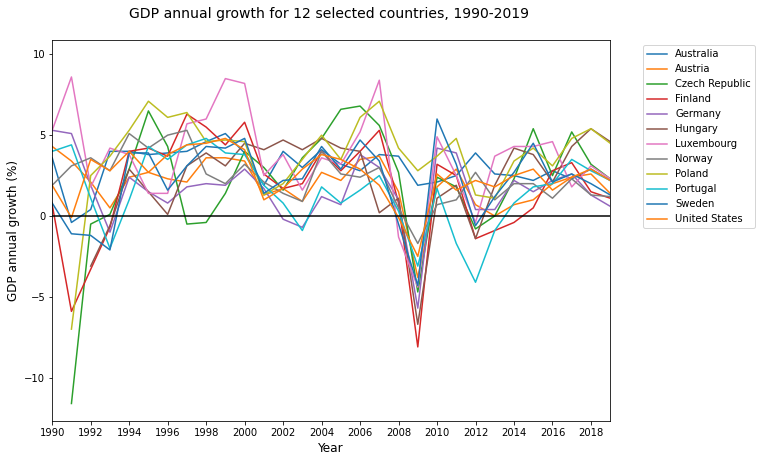

In [ ]:
#GDP growth graph
plt.figure(figsize=(10,7)) #needs to be before the plot, allows the graph to be bigger for the trend to be more clear
plt.plot(GDP_growth['Year'], GDP_growth['Australia'],label='Australia')
plt.plot(GDP_growth['Year'], GDP_growth['Austria'],label='Austria')
plt.plot(GDP_growth['Year'], GDP_growth['Czech Republic'],label='Czech Republic')
plt.plot(GDP_growth['Year'], GDP_growth['Finland'],label='Finland')
plt.plot(GDP_growth['Year'], GDP_growth['Germany'],label='Germany')
plt.plot(GDP_growth['Year'], GDP_growth['Hungary'],label='Hungary')
plt.plot(GDP_growth['Year'], GDP_growth['Luxembourg'],label='Luxembourg')
plt.plot(GDP_growth['Year'], GDP_growth['Norway'],label='Norway')
plt.plot(GDP_growth['Year'], GDP_growth['Poland'],label='Poland')
plt.plot(GDP_growth['Year'], GDP_growth['Portugal'],label='Portugal')
plt.plot(GDP_growth['Year'], GDP_growth['Sweden'],label='Sweden')
plt.plot(GDP_growth['Year'], GDP_growth['United States'],label='United States')
plt.xlim([1990, 2019])
plt.xticks(np.arange(1990, 2019, 2.0))
plt.axhline(y=0, color='black', linestyle='-') #plot a horizontal line
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP annual growth (%)', fontsize=12)
plt.title('GDP annual growth for 12 selected countries, 1990-2019 \n ', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

**Beveridge Curve by Education Levels**

Next, we discriminate the unemployment by three education levels (following set of graphs): basic, intermediate, and advanced. For this analysis, we are checking the unemployment rate of the population with, for example, basic education, as a percentage of the total labour force with basic education. However, job vacancies are not discriminated by education level requirements.

According to the International Standard Classification of Education 2011 (ISCED 2011):
* Basic education comprises primary education or lower secondary education;
* Intermediate education comprises upper secondary or post-secondary non-tertiary education;
* Advanced education comprises short-cycle tertiary education, a bachelor’s degree or equivalent education level, a master’s degree or equivalent education level, or doctoral degree or equivalent education level.

In terms of unemployment for different levels of education, in all 12 analysed countries, the Beveridge curve is more efficient for the population of Advanced education. 

Except for Portugal, the most inefficient labour market is for the individuals with basic education (Beveridge curve further away from the origin, comparing to the other two remaining curves). While in Portugal, on 13 of the 20 periods, the unemployment of individuals with intermediate education was higher than unemployment of individuals with basic education. From 2007 until 2011 and 2004-2005, Portugal followed the general trend (higher unemployment for individuals with basic education).

To conclude, generally, individuals with high education levels suffer less from skill mismatch than individuals with basic education.

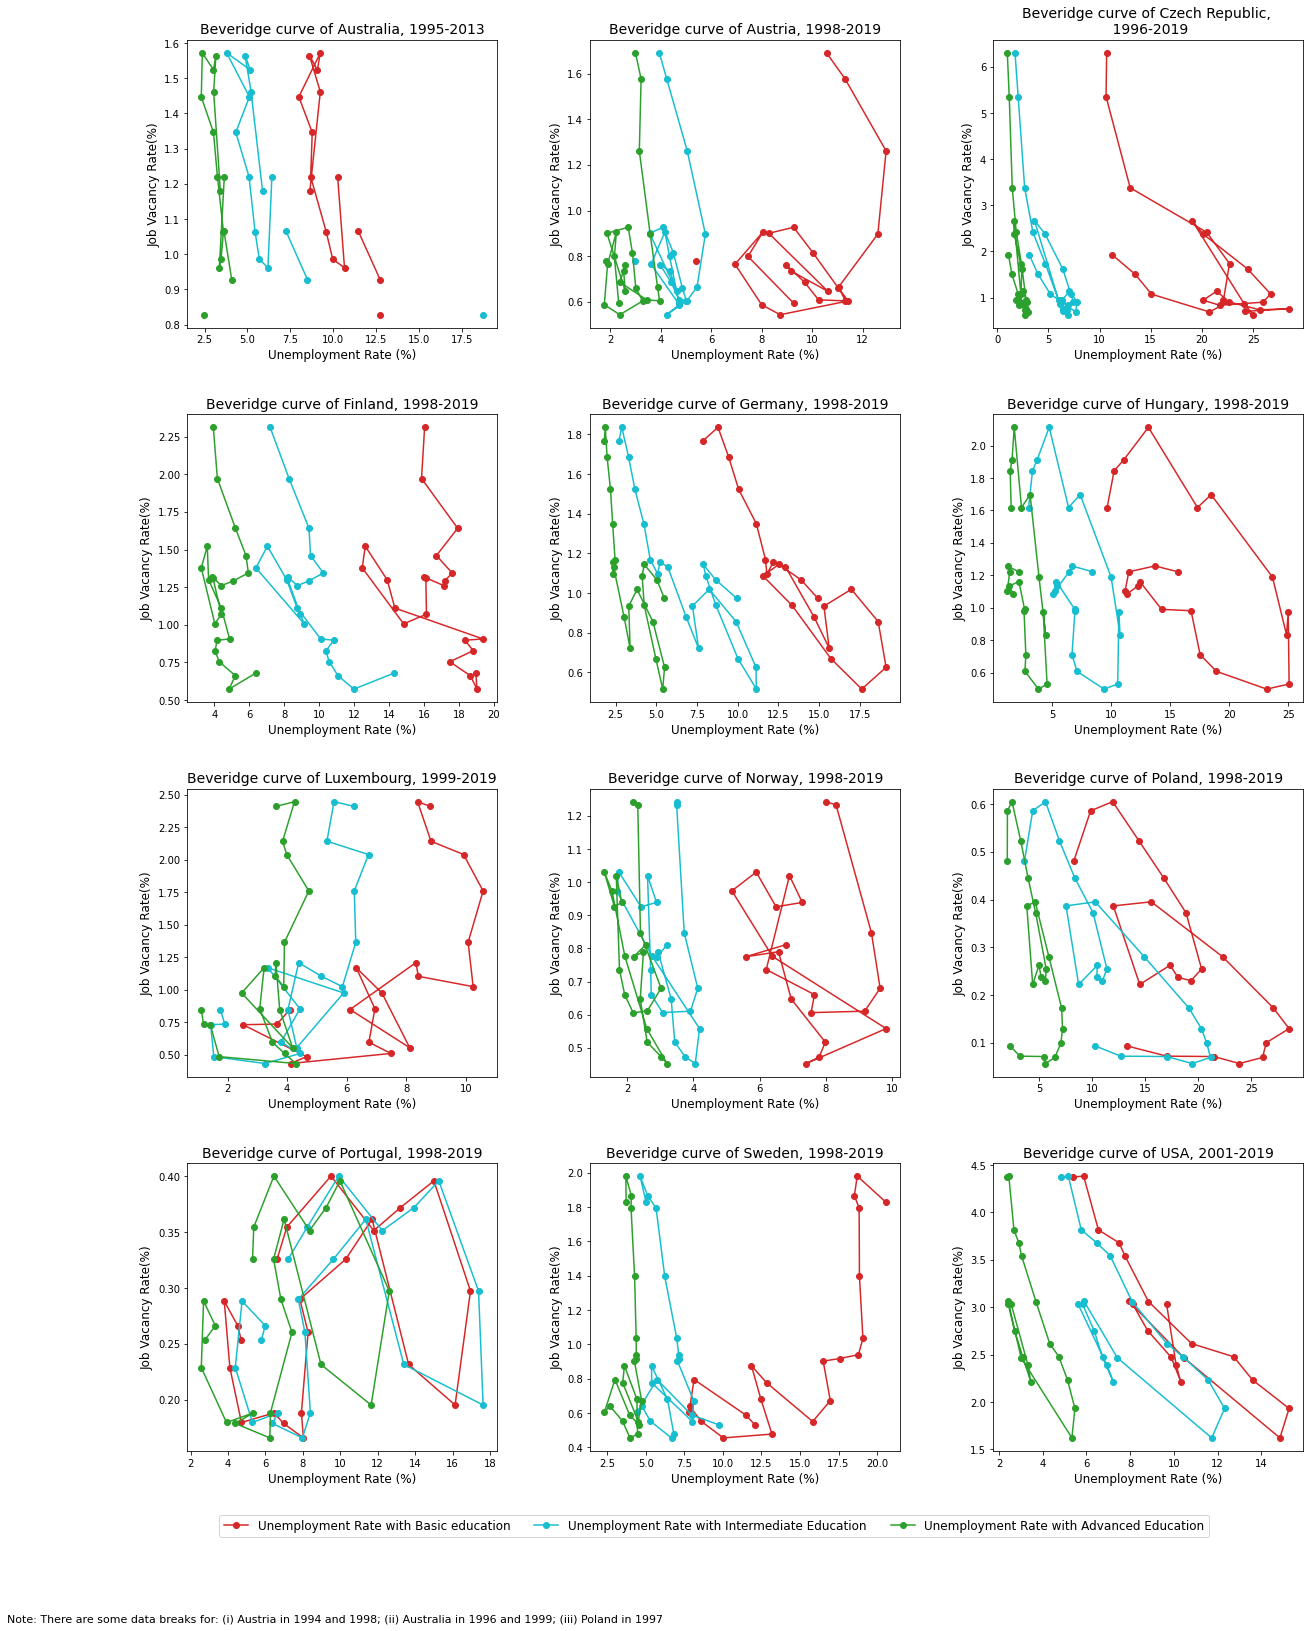

In [ ]:
#Beveridge curve graphs by education level

#start creating the graphs
fig, Bev_educ = plt.subplots(4, 3, figsize=(20,20), sharex=False, sharey=False)

#adjustments so plots x-labels and titles don't overlap
plt.subplots_adjust(left=None, bottom=0.12, right=None, top=1.1, wspace=0.3, hspace=0.3)

#set graphs data
Bev_educ[0,0].plot(Beveridge_Australia['URBasic'], Beveridge_Australia['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[0,0].plot(Beveridge_Australia['URIntermediate'], Beveridge_Australia['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[0,0].plot(Beveridge_Australia['URAdvanced'], Beveridge_Australia['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[0,1].plot(Beveridge_Austria['URBasic'], Beveridge_Austria['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[0,1].plot(Beveridge_Austria['URIntermediate'], Beveridge_Austria['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[0,1].plot(Beveridge_Austria['URAdvanced'], Beveridge_Austria['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[0,2].plot(Beveridge_Czech['URBasic'], Beveridge_Czech['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[0,2].plot(Beveridge_Czech['URIntermediate'], Beveridge_Czech['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[0,2].plot(Beveridge_Czech['URAdvanced'], Beveridge_Czech['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[1,0].plot(Beveridge_Finland['URBasic'], Beveridge_Finland['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[1,0].plot(Beveridge_Finland['URIntermediate'], Beveridge_Finland['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[1,0].plot(Beveridge_Finland['URAdvanced'], Beveridge_Finland['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[1,1].plot(Beveridge_Germany['URBasic'], Beveridge_Germany['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[1,1].plot(Beveridge_Germany['URIntermediate'], Beveridge_Germany['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[1,1].plot(Beveridge_Germany['URAdvanced'], Beveridge_Germany['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[1,2].plot(Beveridge_Hungary['URBasic'], Beveridge_Hungary['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[1,2].plot(Beveridge_Hungary['URIntermediate'], Beveridge_Hungary['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[1,2].plot(Beveridge_Hungary['URAdvanced'], Beveridge_Hungary['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[2,0].plot(Beveridge_Luxembourg['URBasic'], Beveridge_Luxembourg['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[2,0].plot(Beveridge_Luxembourg['URIntermediate'], Beveridge_Luxembourg['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[2,0].plot(Beveridge_Luxembourg['URAdvanced'], Beveridge_Luxembourg['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[2,1].plot(Beveridge_Norway['URBasic'], Beveridge_Norway['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[2,1].plot(Beveridge_Norway['URIntermediate'], Beveridge_Norway['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[2,1].plot(Beveridge_Norway['URAdvanced'], Beveridge_Norway['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[2,2].plot(Beveridge_Poland['URBasic'], Beveridge_Poland['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[2,2].plot(Beveridge_Poland['URIntermediate'], Beveridge_Poland['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[2,2].plot(Beveridge_Poland['URAdvanced'], Beveridge_Poland['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[3,0].plot(Beveridge_Portugal['URBasic'], Beveridge_Portugal['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[3,0].plot(Beveridge_Portugal['URIntermediate'], Beveridge_Portugal['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[3,0].plot(Beveridge_Portugal['URAdvanced'], Beveridge_Portugal['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[3,1].plot(Beveridge_Sweden['URBasic'], Beveridge_Sweden['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[3,1].plot(Beveridge_Sweden['URIntermediate'], Beveridge_Sweden['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[3,1].plot(Beveridge_Sweden['URAdvanced'], Beveridge_Sweden['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')
Bev_educ[3,2].plot(Beveridge_USA['URBasic'], Beveridge_USA['VR'], marker='o', color='tab:red', label='Unemployment Rate with Basic education')
Bev_educ[3,2].plot(Beveridge_USA['URIntermediate'], Beveridge_USA['VR'], marker='o', color='tab:cyan', label='Unemployment Rate with Intermediate Education')
Bev_educ[3,2].plot(Beveridge_USA['URAdvanced'], Beveridge_USA['VR'], marker='o', color='tab:green', label='Unemployment Rate with Advanced Education')


#set labels
Bev_educ[0,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[0,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[0,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[0,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[0,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[0,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[1,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[1,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[1,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[1,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[1,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[1,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[2,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[2,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[2,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[2,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[2,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[2,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[3,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[3,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[3,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[3,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_educ[3,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_educ[3,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)

#Legend
Bev_educ.flatten()[0].legend(loc='upper center', bbox_to_anchor=(1.7, -4.1), ncol=4, prop={'size': 12}) #bbox_to_anchor is the part that set the legend position, it is -4.1 because the position is upper center
#The "prop={'size': 12}" is to set the legend size, because the default was to small compared to the axis labels

#set graphs titles
Bev_educ[0,1].set_title('Beveridge curve of Austria, 1998-2019', fontsize=14) #has data for 1994, but the next info is only in 1998
Bev_educ[0,0].set_title('Beveridge curve of Australia, 1995-2013', fontsize=14) #there are data breaks at 1996 and 1999
Bev_educ[0,2].set_title('Beveridge curve of Czech Republic, \n 1996-2019', fontsize=14)
Bev_educ[1,0].set_title('Beveridge curve of Finland, 1998-2019', fontsize=14)
Bev_educ[1,1].set_title('Beveridge curve of Germany, 1998-2019', fontsize=14)
Bev_educ[1,2].set_title('Beveridge curve of Hungary, 1998-2019', fontsize=14)
Bev_educ[2,0].set_title('Beveridge curve of Luxembourg, 1999-2019', fontsize=14)
Bev_educ[2,1].set_title('Beveridge curve of Norway, 1998-2019', fontsize=14)
Bev_educ[2,2].set_title('Beveridge curve of Poland, 1998-2019', fontsize=14) #with a break in 1997
Bev_educ[3,0].set_title('Beveridge curve of Portugal, 1998-2019', fontsize=14)
Bev_educ[3,1].set_title('Beveridge curve of Sweden, 1998-2019', fontsize=14)
Bev_educ[3,2].set_title('Beveridge curve of USA, 2001-2019', fontsize=14)

#add a fot not in the end of the graphs
plt.figtext(0,0, 'Note: There are some data breaks for: (i) Austria in 1994 and 1998; (ii) Australia in 1996 and 1999; (iii) Poland in 1997', fontsize=11, va="bottom", ha="left")

plt.show()

**Beveridge Curve by Gender**

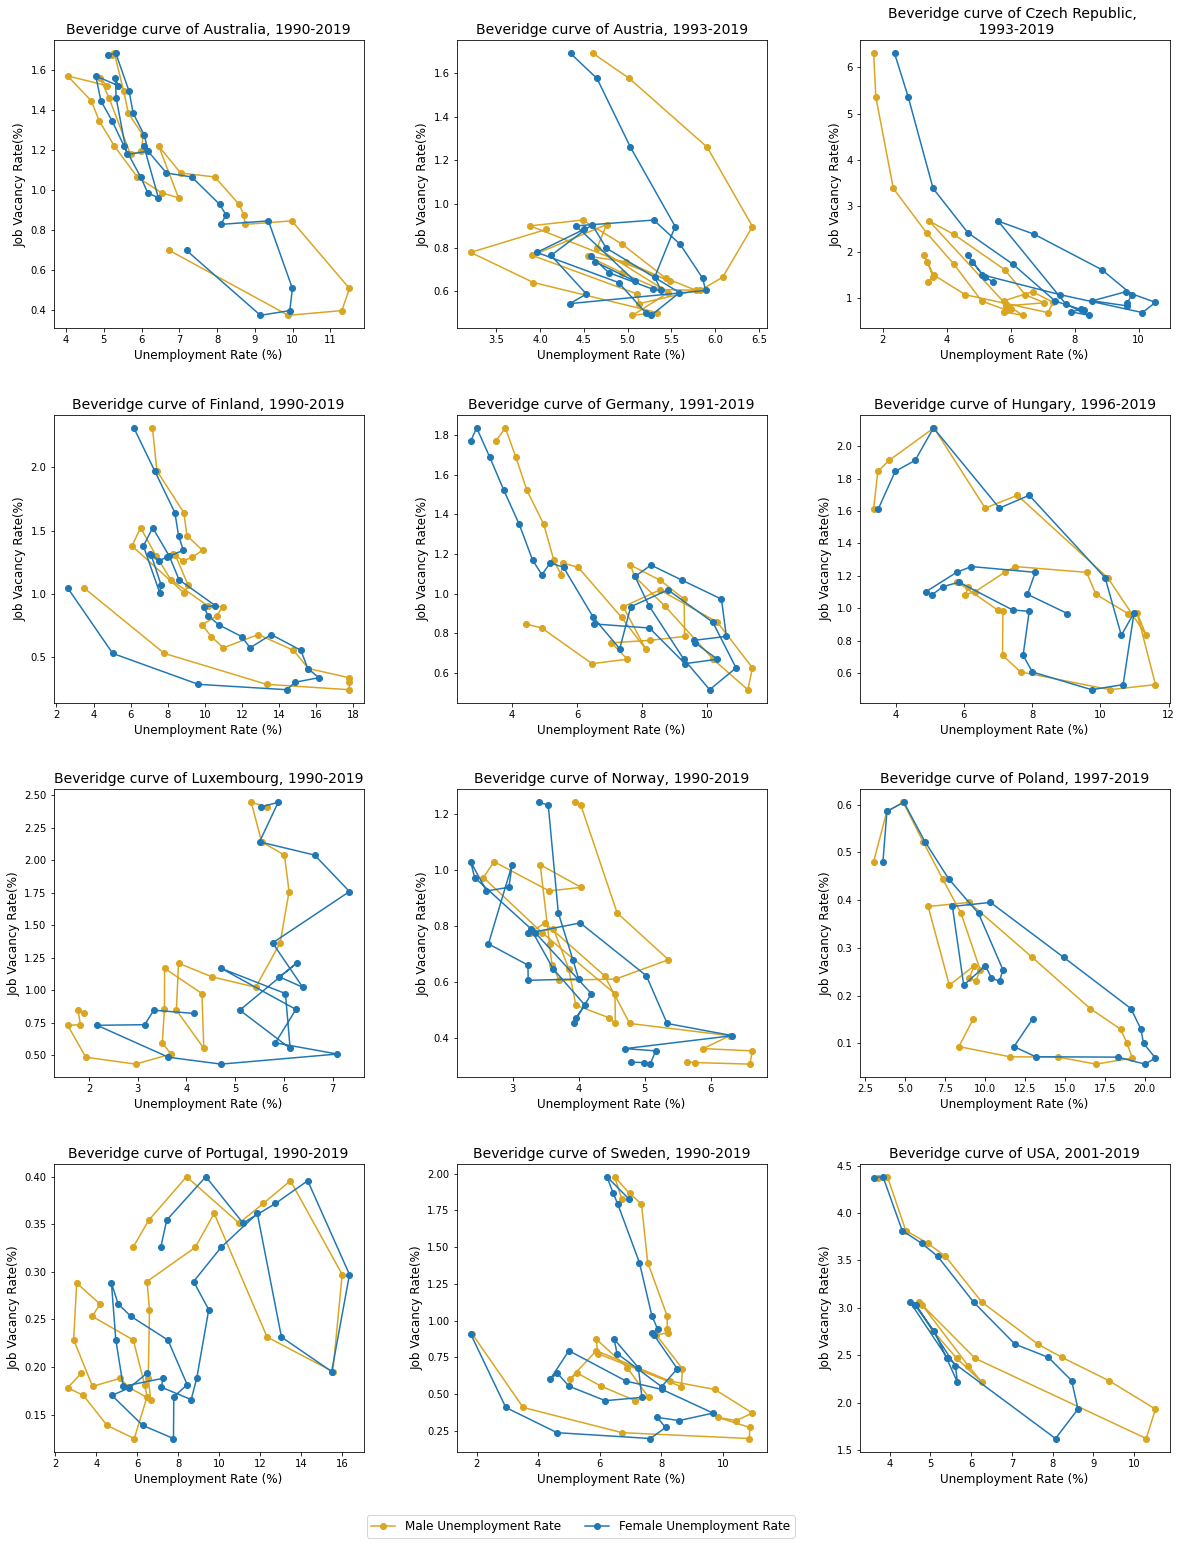

In [ ]:
#Beveridge curve graphs by gender

#start creating the graphs
fig, Bev_gender = plt.subplots(4, 3, figsize=(20,20), sharex=False, sharey=False)

#adjustments so plots x-labels and titles don't overlap
plt.subplots_adjust(left=None, bottom=0.12, right=None, top=1.1, wspace=0.3, hspace=0.3)

#set graphs data
Bev_gender[0,0].plot(Beveridge_Australia['URM'], Beveridge_Australia['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[0,0].plot(Beveridge_Australia['URF'], Beveridge_Australia['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[0,1].plot(Beveridge_Austria['URM'], Beveridge_Austria['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[0,1].plot(Beveridge_Austria['URF'], Beveridge_Austria['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[0,2].plot(Beveridge_Czech['URM'], Beveridge_Czech['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[0,2].plot(Beveridge_Czech['URF'], Beveridge_Czech['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[1,0].plot(Beveridge_Finland['URM'], Beveridge_Finland['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[1,0].plot(Beveridge_Finland['URF'], Beveridge_Finland['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[1,1].plot(Beveridge_Germany['URM'], Beveridge_Germany['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[1,1].plot(Beveridge_Germany['URF'], Beveridge_Germany['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[1,2].plot(Beveridge_Hungary['URM'], Beveridge_Hungary['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[1,2].plot(Beveridge_Hungary['URF'], Beveridge_Hungary['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[2,0].plot(Beveridge_Luxembourg['URM'], Beveridge_Luxembourg['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[2,0].plot(Beveridge_Luxembourg['URF'], Beveridge_Luxembourg['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[2,1].plot(Beveridge_Norway['URM'], Beveridge_Norway['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[2,1].plot(Beveridge_Norway['URF'], Beveridge_Norway['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[2,2].plot(Beveridge_Poland['URM'], Beveridge_Poland['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[2,2].plot(Beveridge_Poland['URF'], Beveridge_Poland['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[3,0].plot(Beveridge_Portugal['URM'], Beveridge_Portugal['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[3,0].plot(Beveridge_Portugal['URF'], Beveridge_Portugal['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[3,1].plot(Beveridge_Sweden['URM'], Beveridge_Sweden['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[3,1].plot(Beveridge_Sweden['URF'], Beveridge_Sweden['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')
Bev_gender[3,2].plot(Beveridge_USA['URM'], Beveridge_USA['VR'], marker='o', color='goldenrod', label='Male Unemployment Rate')
Bev_gender[3,2].plot(Beveridge_USA['URF'], Beveridge_USA['VR'], marker='o', color='tab:blue', label='Female Unemployment Rate')

#set labels
Bev_gender[0,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[0,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[0,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[0,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[0,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[0,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[1,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[1,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[1,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[1,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[1,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[1,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[2,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[2,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[2,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[2,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[2,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[2,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[3,0].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[3,0].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[3,1].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[3,1].set_ylabel('Job Vacancy Rate(%)', fontsize=12)
Bev_gender[3,2].set_xlabel('Unemployment Rate (%)', fontsize=12)
Bev_gender[3,2].set_ylabel('Job Vacancy Rate(%)', fontsize=12)

#Legend
Bev_gender.flatten()[0].legend(loc='upper center', bbox_to_anchor=(1.7, -4.1), ncol=4, prop={'size': 12}) #bbox_to_anchor is the part that set the legend position, it is -4.1 because the position is upper center
#The "prop={'size': 12}" is to set the legend size, because the default was to small compared to the axis labels

#set graphs titles
Bev_gender[0,1].set_title('Beveridge curve of Austria, 1993-2019', fontsize=14) 
Bev_gender[0,0].set_title('Beveridge curve of Australia, 1990-2019', fontsize=14)
Bev_gender[0,2].set_title('Beveridge curve of Czech Republic, \n 1993-2019', fontsize=14)
Bev_gender[1,0].set_title('Beveridge curve of Finland, 1990-2019', fontsize=14)
Bev_gender[1,1].set_title('Beveridge curve of Germany, 1991-2019', fontsize=14)
Bev_gender[1,2].set_title('Beveridge curve of Hungary, 1996-2019', fontsize=14)
Bev_gender[2,0].set_title('Beveridge curve of Luxembourg, 1990-2019', fontsize=14)
Bev_gender[2,1].set_title('Beveridge curve of Norway, 1990-2019', fontsize=14)
Bev_gender[2,2].set_title('Beveridge curve of Poland, 1997-2019', fontsize=14) #with a break in 1997
Bev_gender[3,0].set_title('Beveridge curve of Portugal, 1990-2019', fontsize=14)
Bev_gender[3,1].set_title('Beveridge curve of Sweden, 1990-2019', fontsize=14)
Bev_gender[3,2].set_title('Beveridge curve of USA, 2001-2019', fontsize=14)

plt.show()


Analysing the Beveridge curve  by gender, we can separate in two main groups:

*   Countries on which the curve is mainly even for both genders, like Australia, Austria, Norway, USA, Finland and Germany (it used to be worse for men until 1995 for both), Hungary (but used to be worse for men until 1998) and Sweden (that used to be also worse for man from 1992 until 1998);

*   Countries which the mismatch was higher for women as it was the Czech Republic case (although it improved after 2015), Luxembourg, Poland (at least until de 2007 crisis) and Portugal. However, in Portugal, it seems that the gender gap on unemployment seems to be closing in more recent years.

These groups were created considering if the difference between unemployment on the male population and the unemployment observed on the female population is higher than 1.5 percentual points in absolute terms.

# **Regression Analysis**# 

As discussed, we can clearly see shifts in the curve in a forward or backward way from the period analysed. The regression analysis can help us explain the main drivers of the curve's movements. We will regress the Unemployment Rate on Vacancy Rate and other variables depending on the information available. We are using the baseline model built in a previous paper (Bonthuis. B & Jarvis V. & Vanhala. J, 2013) that include a variable of $$ \text{VR}^2 $$ to capture the convexity of the Beveridge Curve and explain nonlinearities in the relationship between Unemployment and Vacancies.

We will run a more simple model, since as showned previously on the table x, there would be many observations lost if we have used most of labour institutions (like unemployment benefit, tax wedge, and trade union density) and some of the proxy variables for technological progress (like researchers per million people, and R&D investments' weight on GDP).  





First, we will run individual time series regression for the countries that we have 30 observations (Finland, Norway, Portugal and Sweden). The regression specification is the following:

$$
U_{i,t}= \alpha_i + \beta_{1,i} \text{U}_{i,t-1} + \beta_{2,i} \text{VR}_{i,t} + \beta_{2,i} \text{VR}^2_{i,t} + \beta_{3,i} \text{TRADE}_{i,t} +\beta_{4,i} \text{GDPHWKD}_{i,t} +\beta_{5,i} \text{KFOR}_{i,t} +\beta_{6,i} \text{STR_REG}_{i,t} + \beta_{7,i} \text{STR_TEMP}_{i,t} + \beta_{8,i} \text{CRISIS}_t + \beta_{9,i} \text{POST_CRISIS}_t + \epsilon_{it}
$$

Where *i* represents the country and *t* is the year and $i \in {1,...,12}$ and $t \in {1990,...,2019}$.

We defined the variables crisis and post-crisis with the same period for all countries, so it only varies with time (as mentioned before). We chose to use the same model for all four countries to verify possible differences.

We perform a fixed effects regression with the same specification as the time series regressions for a cross-country analysis.


Next, we will use the data of all OECD countries previously delimited and we will run a OLS regression for panel data, aggregating dummies for countries.
A similar approach was used in Borsh-Supan 1991 when analizing the drivers of the Beveridge Curve shifts in Germany. The results will show us average drivers for the shifts of the Beveridge Curve. It was necessary to run a panel data model because some countries, for example the United States, had only 19 observations with data availaible for Vacancy and Unemployment Rate. 

**Results**

1. Checking Correlation of Variables

In [ ]:
#Importing necessary packages
import seaborn as sns

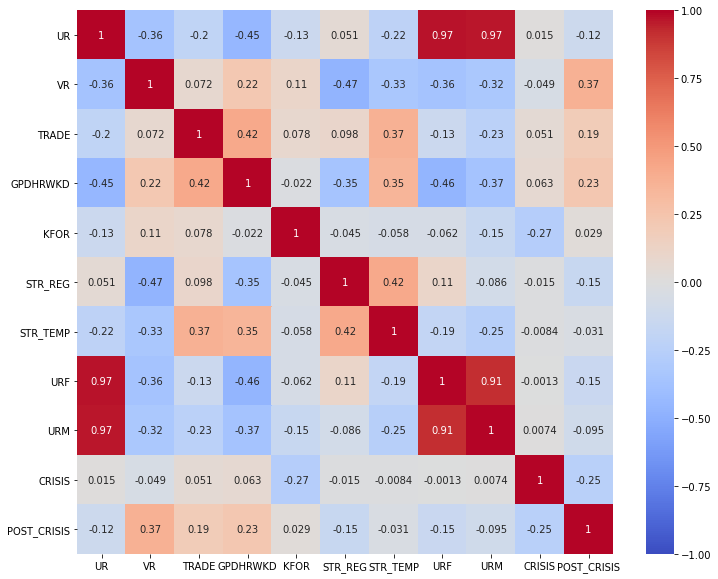

In [ ]:
#Checking correlation of Variables
CorreData=Beveridge[['UR','VR','TRADE','GPDHRWKD','KFOR','STR_REG','STR_TEMP','URF','URM','CRISIS','POST_CRISIS']]
plt.figure(figsize=(12,10))
cor = CorreData.corr()
sns.heatmap(cor, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

The table shows as a high positive correlation between Unemployment Rate and the Unemployment Rate by gender, which is expected. For this reason this two variables will not be inclueded on the regressions, because of eventual multicolinearity issues with the unemployment in t-1. Additionally, there is a medium positive relationship Trade and GDP per hour worked and between the Strictness of Employment Protection of Regular and Temporary Jobs (but the correlation is still lower than 0.5). The Vacancy Rate has also a considerable positive relationship with the years after crisis. Following the inverse relationship between vacancies and unemployment, there is a negative relationship between Unemployment and the years after the crisis.  This could imply that in the years after the crisis, the countries recovered decreasing Unemployment and generating more Vacancies, along with the theory of the Beveridge Curve.

2. Time-Series Regressions

In [ ]:
!pip install linearmodels
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

     |████████████████████████████████| 1.8MB 6.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.5MB 22.4MB/s 
  Created wheel for linearmodels: filename=linearmodels-4.19-cp36-cp36m-linux_x86_64.whl size=1665191 sha256=cc2ecf1e48e7129673677ae3eaf1d62d9a22c03a644686a6dc7ad315ab5ff94e
  Stored in directory: /root/.cache/pip/wheels/dd/64/0e/ee05b98b192012376a8ff7f2130093f7d0706d8e7698b31c0d
Successfully built linearmodels
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#For Finland
Beveridge_Finland['lagUR'] = Beveridge_Finland['UR'].shift(-1)
X=Beveridge_Finland[['VR','VR2','lagUR','TRADE','GPDHRWKD','STR_REG','STR_TEMP','KFOR','CRISIS','POST_CRISIS']]
Y=Beveridge_Finland['UR']
X=sm.add_constant(X)
model_Finland=sm.OLS(Y,X,missing='drop').fit()
print_model_Finland=model_Finland.summary()
print(print_model_Finland)

                            OLS Regression Results                            
Dep. Variable:                     UR   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     28.75
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           4.92e-09
Time:                        15:20:44   Log-Likelihood:                -32.129
No. Observations:                  29   AIC:                             86.26
Df Residuals:                      18   BIC:                             101.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.6000     16.291      1.019      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In the case of Finland, both variables related to job vacancies rate are statistically significant and behave like the theoretical Beveridge curve (negative convex relation). Addionally, there is one statistically significant variable that could be the cause of outward shifts of the Curve: gross fixed capital formation growth. This variable and GDP per hour worked were introduced to try to account for techonological progress, as explained before. Both variables have positive coefficients, which may indicate that technological progress leads to an increase of skills mismatch (among demand and supply). 

The dummies that define the crisis and post crisis periods didn't revealed to be statistically significant for finland. For the crisis dummy, it was already expected, since by the graphical analysis there is no clear shift of the curve. The curve apparently shifted outwards after 2010.

In [ ]:
#This is the results  with the interpolated data from Finland but there are no significant changes.
Beveridge_Finland1['lagUR'] = Beveridge_Finland1['UR'].shift(-1)
X=Beveridge_Finland1[['VR','VR2','lagUR','TRADE','GPDHRWKD','STR_REG','STR_TEMP','KFOR', 'CRISIS','POST_CRISIS']]
Y=Beveridge_Finland1['UR']
X=sm.add_constant(X)
model_Finland1=sm.OLS(Y,X,missing='drop').fit()
print_model_Finland1=model_Finland1.summary()
print(print_model_Finland1)

                            OLS Regression Results                            
Dep. Variable:                     UR   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     28.75
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           4.92e-09
Time:                        15:18:08   Log-Likelihood:                -32.129
No. Observations:                  29   AIC:                             86.26
Df Residuals:                      18   BIC:                             101.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.6000     16.291      1.019      

In [ ]:
#For Norway
Beveridge_Norway['lagUR'] = Beveridge_Norway['UR'].shift(-1)
X=Beveridge_Norway[['VR','VR2','lagUR','TRADE','GPDHRWKD','STR_REG','STR_TEMP','KFOR','CRISIS','POST_CRISIS']]
Y=Beveridge_Norway['UR']
X=sm.add_constant(X)
model_Norway=sm.OLS(Y,X,missing='drop').fit()
print_model_Norway=model_Norway.summary()
print(print_model_Norway)

                            OLS Regression Results                            
Dep. Variable:                     UR   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     13.52
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.65e-06
Time:                        15:22:50   Log-Likelihood:                -9.4129
No. Observations:                  29   AIC:                             38.83
Df Residuals:                      19   BIC:                             52.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
VR             -8.0956      4.429     -1.828      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The previous OLS time-series regression is for the case of  Norway. Again, the job vacancy rate has the right signs (negative convex relationship with unemployment), but this time the VR2 is not statistically significant. 

In this case, the variables that try to capture the effects of techonological progress have contraditory signs (GDPHRWKD has a negative coeficient, while KFOR has a positive coeficient). Only GDPPHRWD appeared to be statistically significant at 10%.

Employment protection for regular contracts seems to create an outward shift of the curve (firms are more caution to open up new vacancies). On the other hand, it seems that regulation on temporary contracts provoke an inward shift of the curve (it may be harder to fire employees). Both indexes of employment strictness are statistically significant from zero.

In [ ]:
#For Portugal
Beveridge_Portugal['lagUR'] = Beveridge_Portugal['UR'].shift(-1)
X=Beveridge_Portugal[['VR','VR2','lagUR','TRADE','GPDHRWKD','STR_REG','STR_TEMP','KFOR','CRISIS','POST_CRISIS']]
Y=Beveridge_Portugal['UR']
X=sm.add_constant(X)
model_Portugal=sm.OLS(Y,X,missing='drop').fit()
print_model_Portugal=model_Portugal.summary()
print(print_model_Portugal)

                            OLS Regression Results                            
Dep. Variable:                     UR   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     58.91
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.14e-11
Time:                        15:24:06   Log-Likelihood:                -25.227
No. Observations:                  29   AIC:                             72.45
Df Residuals:                      18   BIC:                             87.49
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.7815     13.980      1.844      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Has observed before, Portugal Beveridge curve behaves in a rather erratic maner. We have a positive (and concave) relationship between unemployment and vacancies (VR has a positive coefficient and VR2 has a negative coeficient).

Again, the techonological progress variables have contradictory signs. 

The Post crisis dummy behaves as expected, where we observe an inward shift of the curve and its coeficient is statiscially significant.

(talk maybe about strutural changes and problems that may lead to this).

In [ ]:
#For Sweden
Beveridge_Sweden['lagUR'] = Beveridge_Sweden['UR'].shift(-1)
X=Beveridge_Sweden[['VR','VR2','lagUR','TRADE','GPDHRWKD','STR_REG','STR_TEMP','KFOR','CRISIS','POST_CRISIS']]
Y=Beveridge_Sweden['UR']
X=sm.add_constant(X)
model_Sweden=sm.OLS(Y,X,missing='drop').fit()
print_model_Sweden=model_Sweden.summary()
print(print_model_Sweden)

                            OLS Regression Results                            
Dep. Variable:                     UR   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     12.77
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           2.99e-06
Time:                        15:26:27   Log-Likelihood:                -27.123
No. Observations:                  29   AIC:                             76.25
Df Residuals:                      18   BIC:                             91.29
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -62.3122     32.782     -1.901      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


For  Sweden, we can see the expected behaviour (negative convex relationship between unemployment and job vacancies). Two drivers of shifts of the curve is (i) GDPHRWKD with a positive coeficient (techonology leads to more mismatch); (ii) both variables of employment protection.

The two dummies for the crisis and post-crisis period aren't statistically significat. During the crisis, graphically doesn't seem to be a shift of the curve, so not being statistically significant makes sense. After the crisis the curve moved outward, so the sign of the coefficient goes according to what we expected initially.

We might have multicolineary problems because of the employment protection indexes that are medium/strong correlated.

2. Panel Data Regression

In [ ]:
#Downloading Panel regressions command
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

In [ ]:
#Setting the indexes for the model to work with Year Dummies
year=pd.Categorical(Beveridge.Year)
Beveridge=Beveridge.set_index(['Country','Year'])
Beveridge['Year']=year
print(Beveridge.head())

In [ ]:
#PanelOLS regression 
Beveridge['lagUR'] = Beveridge['UR'].shift(-1)
exog_vars=['VR','VR2','lagUR','TRADE','GPDHRWKD','STR_REG','STR_TEMP','KFOR','CRISIS','POST_CRISIS']
exog=sm.add_constant(Beveridge[exog_vars])
mod=PanelOLS(Beveridge.UR, exog,entity_effects=True)
fe_res=mod.fit()
print(fe_res)


                          PanelOLS Estimation Summary                           
Dep. Variable:                     UR   R-squared:                        0.8184
Estimator:                   PanelOLS   R-squared (Between):              0.1446
No. Observations:                 306   R-squared (Within):               0.8184
Date:                Tue, Jan 19 2021   R-squared (Overall):              0.5977
Time:                        14:14:42   Log-likelihood                   -446.51
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      127.99
Entities:                          12   P-value                           0.0000
Avg Obs:                       25.500   Distribution:                  F(10,284)
Min Obs:                       12.000                                           
Max Obs:                       30.000   F-statistic (robust):             127.99
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
#PanelOLS regression with interpolated data
year=pd.Categorical(Beveridge1.Year)
Beveridge1=Beveridge1.set_index(['Country','Year'])
Beveridge1['Year']=year
#print(Beveridge1.head())
Beveridge1['lagUR'] = Beveridge1['UR'].shift(-1)
exog_vars=['VR','VR2','lagUR','TRADE','GPDHRWKD','STR_REG','STR_TEMP','KFOR','CRISIS','POST_CRISIS']
exog=sm.add_constant(Beveridge1[exog_vars])
mod=PanelOLS(Beveridge1.UR, exog,entity_effects=True)
fe_res=mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     UR   R-squared:                        0.8180
Estimator:                   PanelOLS   R-squared (Between):              0.1535
No. Observations:                 308   R-squared (Within):               0.8180
Date:                Tue, Jan 19 2021   R-squared (Overall):              0.6164
Time:                        14:17:26   Log-likelihood                   -449.46
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      128.52
Entities:                          12   P-value                           0.0000
Avg Obs:                       25.667   Distribution:                  F(10,286)
Min Obs:                       13.000                                           
Max Obs:                       30.000   F-statistic (robust):             128.52
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


For the Panel regression, the first results were done with the 12 country dataset, and the second regression was done with the interpolated dataset. The coefficients show us the average effect for all countries of the exogenous variables on the Unemployment Rate. The direction of the coefficients (positive or negative) does not change among regressions, but we can see slight differences in their values. Since the differences between both regressions are not substantial, we will interpret only the raw data Panel OLS regression values. 

Unlike the time series regression for individual countries, we have more significative variables in the Panel regressions that may cause shifts on the Beveridge curve. We can see that the curve's expected behaviour complies as the Vacancy Rate coefficient has a significative negative effect, and the VR2 variable is positive and significative. The lag of Unemployment Rate affects shifts the curve to the right, as the coefficient is positive.

The Trade Variable has a minimal positive effect, but it is not significative. GDPHRWKD and KFOR both have positive significant coefficients (at 10% and 5%).  This can be interpreted as technology and capital growth replacing human labour, generating unemployment mismatch as the workers are not qualified to work with new technologies or are replaced. Both the Strictness of Proteccion for Regular and Temporary Jobs shift the curve to the left. 

Finally, the dummy variables for Crisis and Post-Crisis have a negative coefficient, but only the Crisis dummy variable is significative. Since we analyse average behaviour, our sample countries behaved differently during and after the crisis. Some were far worse in the years after the financial crisis than during the crisis, which could explain the Crisis Variable's negative coefficient. Other countries rather than shifting their Beveridge Curve during or after the crisis, moved within the same curve. All of this differences in behavior could explain the coefficients and significance of the dummy variables.





**Summary of significative Variables and coefficient signs**

| Variable    | Finland | Finland-Interp. | Norway | Portugal | Sweden | PanelOLS | PanelOLS-Interp. |
|-------------|---------|-----------------|--------|----------|--------|----------|------------------|
| VR          |   $-^*$      |    $-^*$     |    $-^.$   |     $+ ^.$    |    $-^*$   |    $-^{***}$   |        $-^{**}$       |
| VR2         |   $ + ^.$    |        $ + ^.$        |   $+$    |     $-$     |    $+$   |     $+^.$    |        $ + ^.$      |
| lagUR       |    $+$     |       $+$          |   $+$    |    $+^{***}$   |   $-$     |    $+^{***}$   |        $+^{***}$       |
| TRADE       |    $+$     |          $+$       |    $-$    |     $+$     |   $-$     |     $+$     |         $+^*$        |
| GDPHRWKD    |    $+$     |        $+$         |    $-^.$   |    $-^.$    |    $+^.$   |    $+^.$    |       $+$          |
| STR_REG     |     $-$    |        $-$         |   $+^*$   |    $-^{**}$    |    $+^*$   |    $-^{***}$   |        $-^{***}$       |
| STR_TEMP    |    $-$     |        $-$         |    $-^.$   |     $-$     |   $-^{**}$   |     $-^*$    |        $-^.$        |
| KFOR        |    $+^*$    |        $+^*$        |   $+$   |     $+$     |   $-$     |    $+^{***}$   |        $+^{***}$       |
| CRISIS      |    $-$     |        $-$         |     $+$    |     $-^*$    |   $-$     |    $-^{**}$    |        $-^{**}$        |
| POST_CRISIS |  $+$       |        $+$         |     $+$    |    $-^*$    |   $+$     |     $-$     |        $-$          |

In [ ]:
#Signif. codes: 0  '***' 0.001 '**' 0.01 '*' 0.05 '.'0.1 ' ' 1

#Confirm if it is the following:
#Signif. codes: 0 '***', '**' 0.01, '*' 0.05, '.'0.1, ' ' 1

# **Conclusion**

From our analyses, it is possible to observe the Beveridge Curve's existence in all twelve countries, except for Portugal and Luxembourg.

Graphically we found that different countries reacted differently to the crisis:
Some do not appear to decrease matching efficiencies, like the case for the Czech Republic, Luxembourg, Finland, and Sweden.
There was an outward shift in Australia, Norway, Portugal, Hungary and the USA.
Lastly, during the crisis, some countries' labour market's efficiency seems to have improved (inward shift), which looks to be the case of Germany, Austria and Poland.

This heterogeneity of reactions was also observable for the period after the crisis: (i) four countries' Beveridge curve appeared to have returned to similar previous mismatch levels; (ii) six countries appeared to have had an outward shift of the curve for this period; and (iii) for the remaining two, there is no apparent movement of the curve (only along the curve).

We further checked that there was an economic expansion in recent years, and all 12 countries had comparative low unemployment rates and high job vacancy rates.

We could additionally verify that the mismatch issue is more significant for Low-education individuals.

Furthermore, we can conclude that our regressions' results are limited by the available data (type and frequency). Even with imperfect econometric models, we could find negative convex relation between unemployment and vacancies in all regressions except for the Portuguese time series (but this was already expected).

The regression that included data from all countries (Panel OLS) revealed a negative coefficient for the period after the crisis, which reveals (assuming that all OLS assumptions hold) that during this period there was, on average, an inward shift of the curve to better levels than the ones observed before the crisis.

Finally, for future research, we propose using a bigger database and other variables that could be used as instruments, to solve for possible multicollinearity issues, since we have some correlated independent variables (employment protection indexes). Quarterly data would also be desirable. With this, it would be possible to run more accurate regressions. Additionally, it would be interesting to analyse countries outside of the OECD to see how their Beveridge curves behave and how their labour markets were affected by the crisis.

**References**

Aghion, P., & Howitt, P. (1992). A Model of Growth Through Creative Destruction. *Econometrica*, 60(2), 323-351. doi:10.2307/2951599

Börsch-Supan, A. (1991). Panel Data Analysis of the Beveridge Curve: Is There a Macroeconomic Relation between the Rate of Unemployment and the Vacancy Rate? Economica, 58(231), new series, 279-297. doi:10.2307/2554817

Destefanis, S., & Mastromatteo, G. (2015). The OECD Beveridge Curve: technological progress, globalisation and institutional factors. *Eurasian Business Review*, 5(1), 151–172. https://doi.org/10.1007/s40821-015-0019-z

Destefanis, S., Fragetta, M., Mastromatteo, G., & Ruggiero, N. (2020). The Beveridge curve in the OECD before and after the great recession. *Eurasian Economic Review,* 10(3), 411–436. https://doi.org/10.1007/s40822-019-00140-2

Dow, J., & Dicks-Mireaux, L. (1958). The Excess Demand for Labour. A Study of Conditions in Great Britain, 1946-56. *Oxford Economic Papers, 10(1)*, new series, 1-33. Retrieved January 6, 2021, from http://www.jstor.org/stable/2661871

Erken, H., van Loon, E. & Verbeek, W. Mismatch on the Dutch Labour Market in the Great Recession. De Economist 163, 435–459 (2015). https://doi.org/10.1007/s10645-015-9257-9

Lubik, T., & Rhodes, K. (2014). Putting the Beveridge Curve Back to Work. *EB14-09 - Federal Reserve Bank of Richmond*. Retrieved January 8, 2021, from https://www.richmondfed.org/-/media/richmondfedorg/publications/research/economic_brief/2014/pdf/eb_14-09.pdf


OECD (2021), Tax wedge (indicator). doi: 10.1787/cea9eba3-en (Accessed on 09 January 2021)

Romer, P. (1990). Endogenous Technological Change. *Journal of Political Economy*, 98(5), S71-S102. Retrieved January 15, 2021, from http://www.jstor.org/stable/2937632

Vanhala, Juuso & Bonthuis, Boele & Jarvis, Valerie, 2013. "What’s going on behind the euro area Beveridge curve(s)?," Working Paper Series 1586, European Central Bank.




https://www.cpb.nl/sites/default/files/publicaties/download/cpb-discussion-paper-303-mismatch-dutch-labour-market-great-recession.pdf

https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp1586.pdf


 